# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "codegeex4" # "llama3" # "qwen2.5" # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name, 
    'options': {
        'gpu': True,
    }    
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)


In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    vn.remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warmup





# QUESTION :  How many customers are there



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers;


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Assuming df is a pandas DataFrame with a single column named 'COUNT(*)'
if len(df.columns) == 1:
    value = df.iloc[0, 0]
    fig = go.Figure(go.Indicator(
        mode="number",
        value=value,
        title={'text': "Number of Customers"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    # Assuming the DataFrame has a single column for simplicity
    fig = go.Figure(go.Bar(x=df.columns, y=df.iloc[0]))

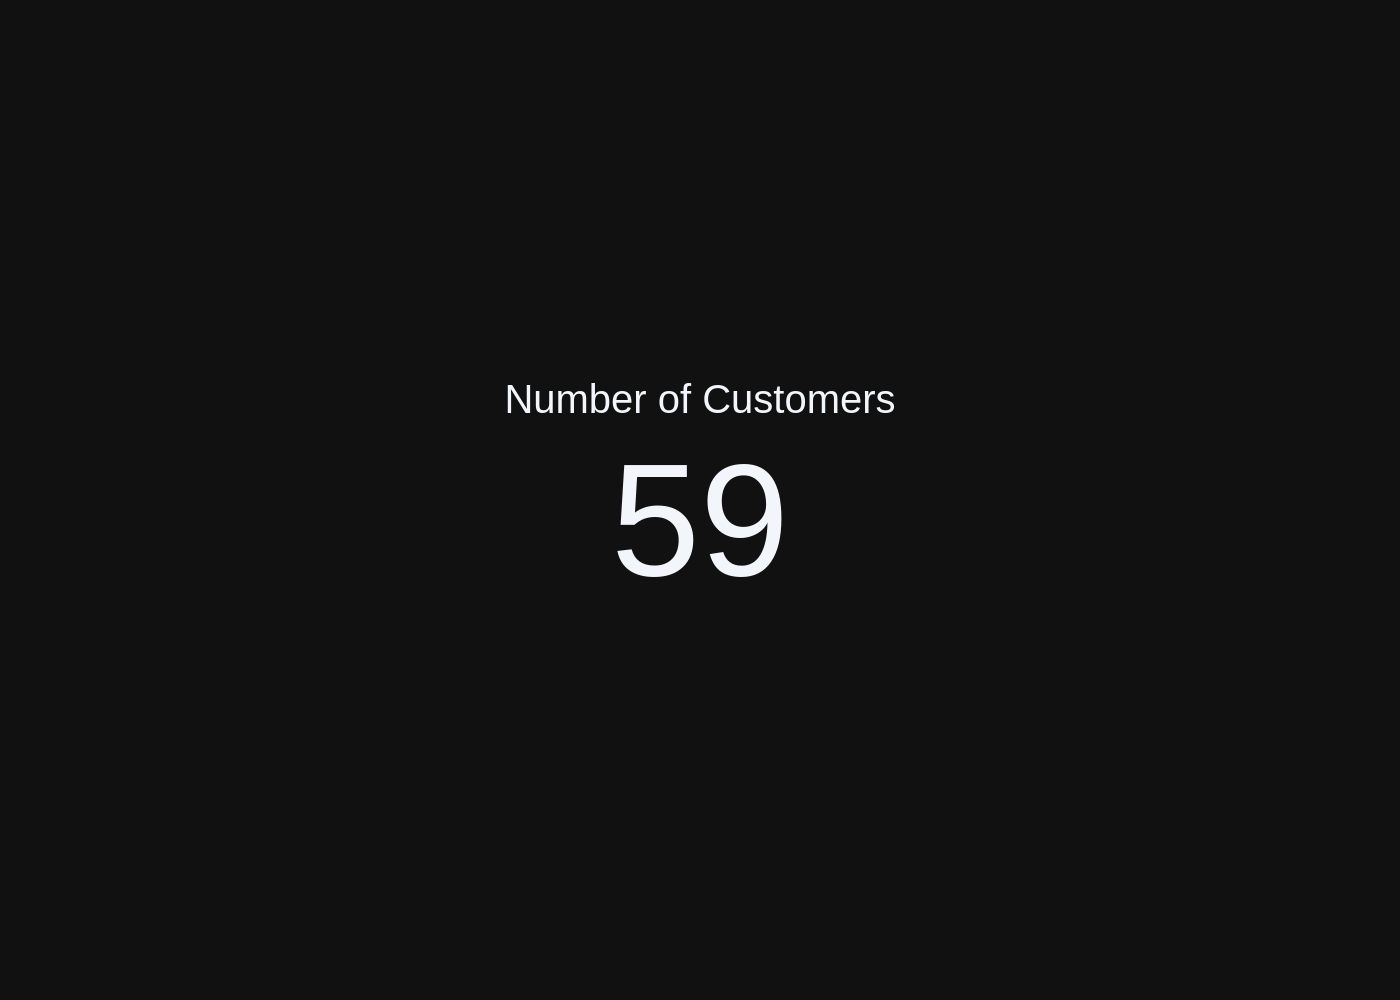

elapsed_time = 4.728910207748413


In [13]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [15]:
!pip show vanna

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Name: vanna
Version: 0.7.4
Summary: Generate SQL queries from natural language
Home-page: 
Author: 
Author-email: Zain Hoda <zain@vanna.ai>
License: 
Location: /home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
Editable project location: /home/gongai/projects/wgong/ssadata
Requires: flasgger, flask, flask-sock, kaleido, pandas, plotly, requests, sqlalchemy, sqlparse, tabulate
Required-by: 


### Loop over questions

In [16]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if there's only one table name in the DataFrame
if len(df) == 1:
    fig = px.indicator(
        value=1,
        title="Table Count",
        mode="number",
        number=df['name'].values[0]
    )
else:
    fig = px.bar(df, x='name', y='count', title='Table Counts')

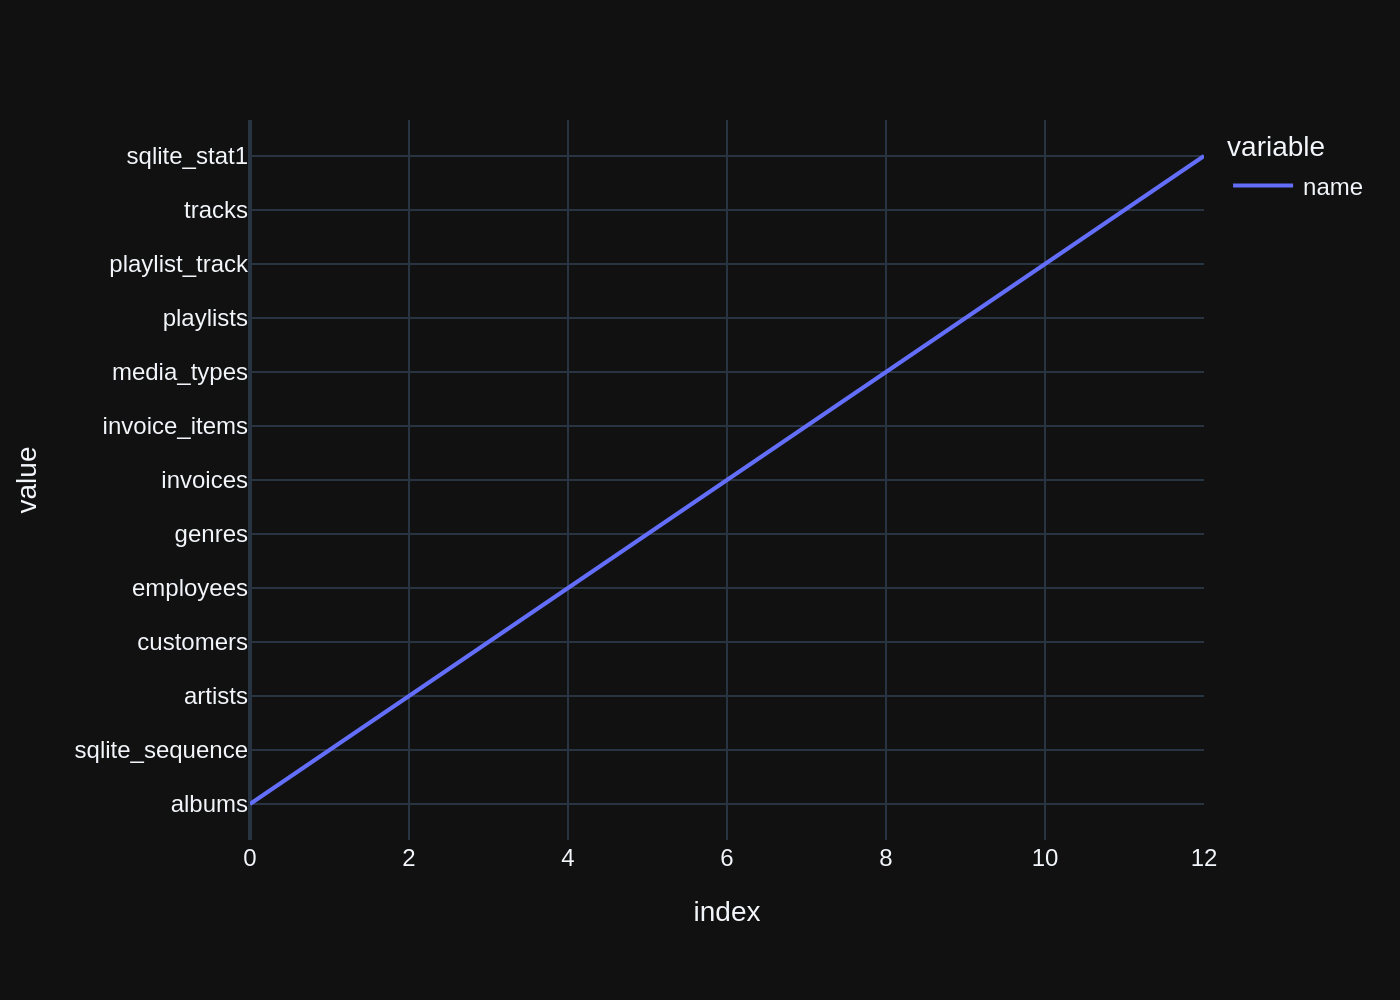





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]

intermediate_sql SELECT DISTINCT(TableName) 
FROM (SELECT tbl_name AS TableName FROM sqlite_master)
WHERE TableName LIKE 'orders'



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table' LIMIT 20

SELECT * FROM invoices LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' LIMIT 20

SELECT * FROM invoices LIMIT 20;


[( RETRY )]
***** 3 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table' LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' LIMIT 20;


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

def generate_plot(df):
    if len(df) == 1:
        fig = px.indicator(
            value=df.iloc[0]['name'],
            title="Table storing customer's orders",
            domain={"x": [0, 1], "y": [0, 1]},
            mode='number',
            number= {
                "prefix": "",
                "valueformat": ".2f"
            }
        )
    else:
        fig = px.bar(df, x='name', y='count', labels={'name':'Table', 'count':'Count'})
    
    return fig





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers;


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if the DataFrame has more than one row
if len(df) > 1:
    fig = go.Figure(go.Bar(x=df.index, y=df['COUNT(*)']))
    fig.update_layout(title='Customer Count', xaxis_title='Category', yaxis_title='Count')
else:
    value = df.iloc[0]['COUNT(*)']
    fig = go.Figure(go.Indicator(mode="gauge+number", value=value, title={'text': "Customer Count"}))

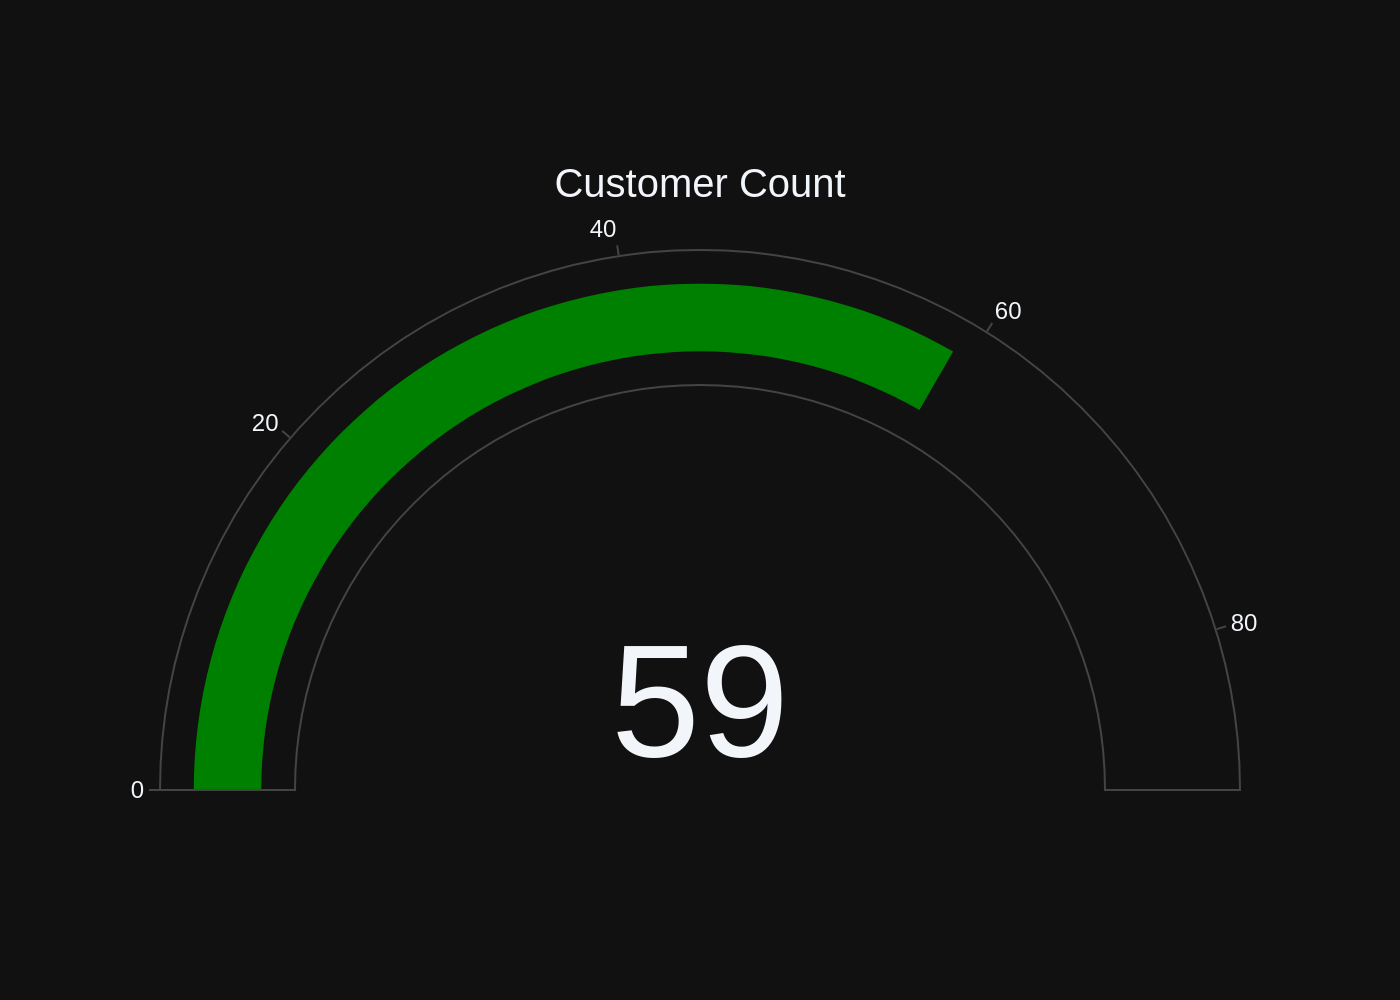





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT BillingCountry, COUNT(*) as count FROM invoices GROUP BY BillingCountry ORDER BY count DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT BillingCountry, COUNT(*) as count FROM invoices GROUP BY BillingCountry ORDER BY count DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,BillingCountry,count
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if there's only one country in the DataFrame
if len(df) == 1:
    fig = px.indicator(
        value=1,
        title="Top Billing Country",
        mode="number"
    )
else:
    fig = px.bar(
        df, 
        x='BillingCountry', 
        y='count',
        title="Top 5 Billing Countries",
        color_discrete_sequence=['#4daf4a']
    )

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)

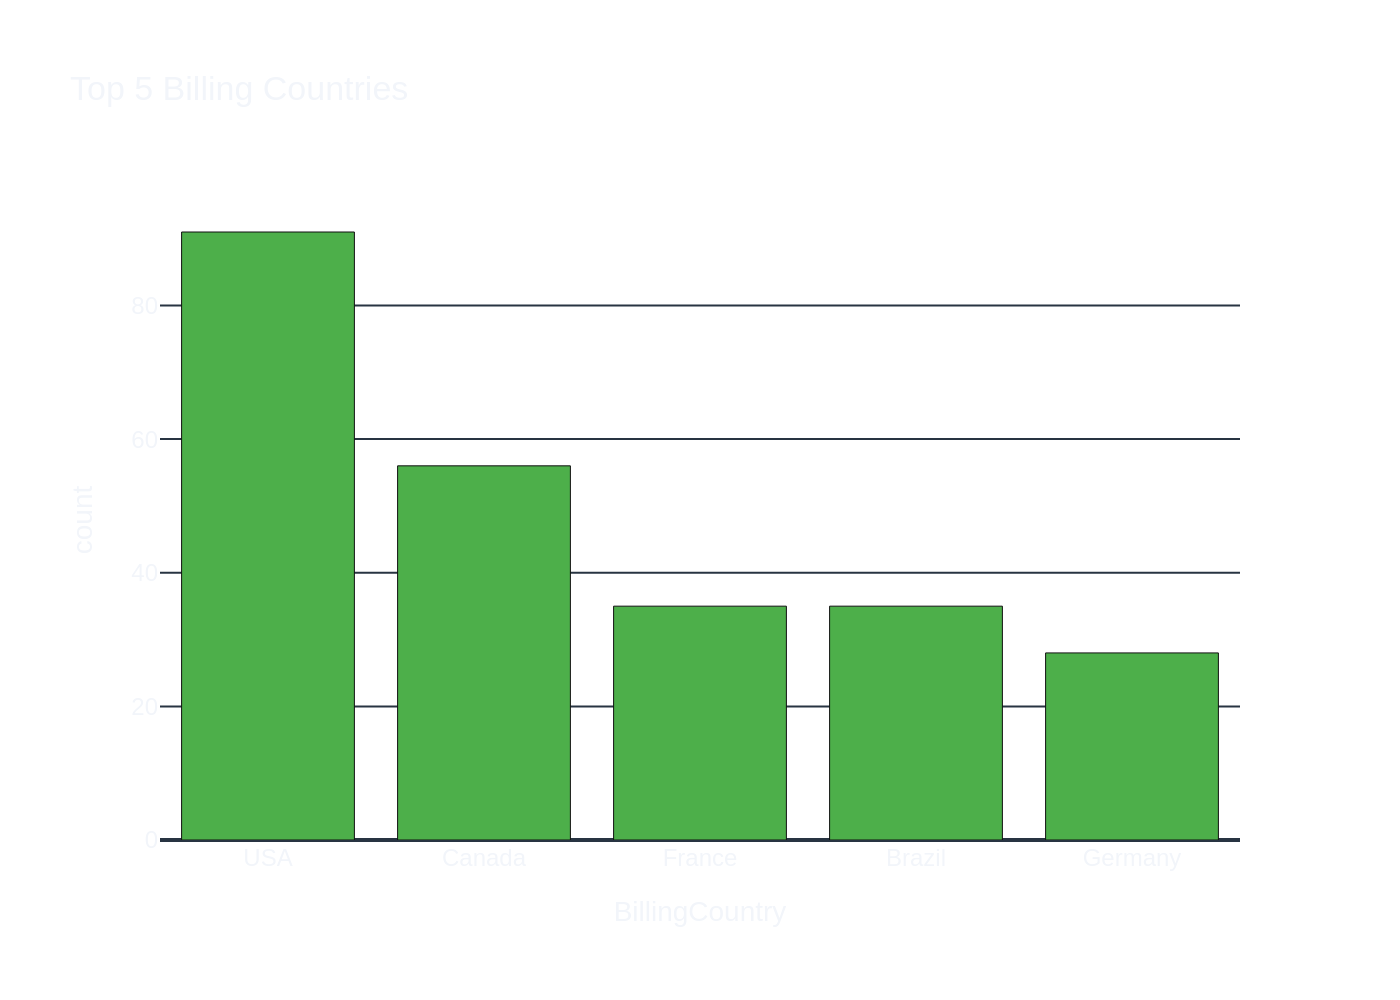





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Title, ar.Name FROM albums AS a JOIN artists AS ar ON a.ArtistId = ar.ArtistId;


[( <SQL> )]
generated SQL statement



SELECT a.Title, ar.Name FROM albums AS a JOIN artists AS ar ON a.ArtistId = ar.ArtistId;


[( <DataFrame> )]
queried dataframe



,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) > 1:
    fig = px.bar(df, x='Title', y='Name')
else:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['Name'],
        title={'text': df.iloc[0]['Title']},
    ))

fig.update_layout(template='plotly_dark')

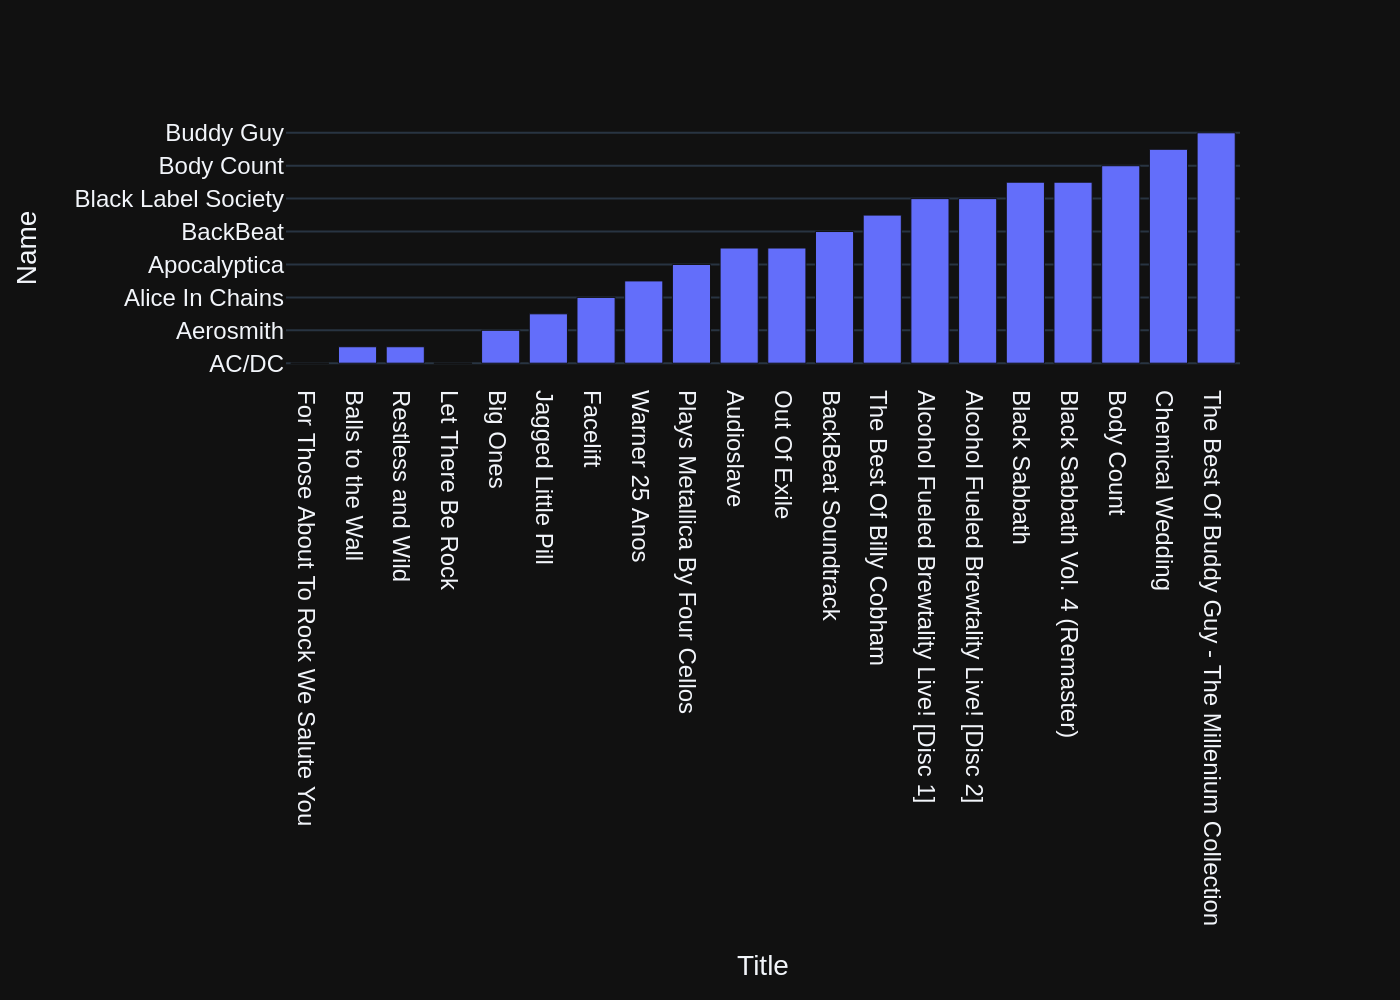





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM tracks WHERE Name LIKE '%What%';


[( <SQL> )]
generated SQL statement



SELECT * FROM tracks WHERE Name LIKE '%What%';


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if the DataFrame has only one row
if len(df) == 1:
    # Create a Gauge chart for single value
    fig = go.Figure(go.Indicator(
        mode="gauge",
        value=df.iloc[0]['UnitPrice'],
        title={'text': "Unit Price"},
        gauge={'axis': {'range': [None, max(df['UnitPrice'])]},
               'steps' : [
                   {'range': [0, 1], 'color': "lightgray"},
                   {'range': [1, max(df['UnitPrice'])], 'color': "gray"}]}))
else:
    # Create a Bar chart for multiple values
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['UnitPrice'])])

# Update layout and show plot
fig.update_layout(title='Chart of Tracks with Names Containing "What"')

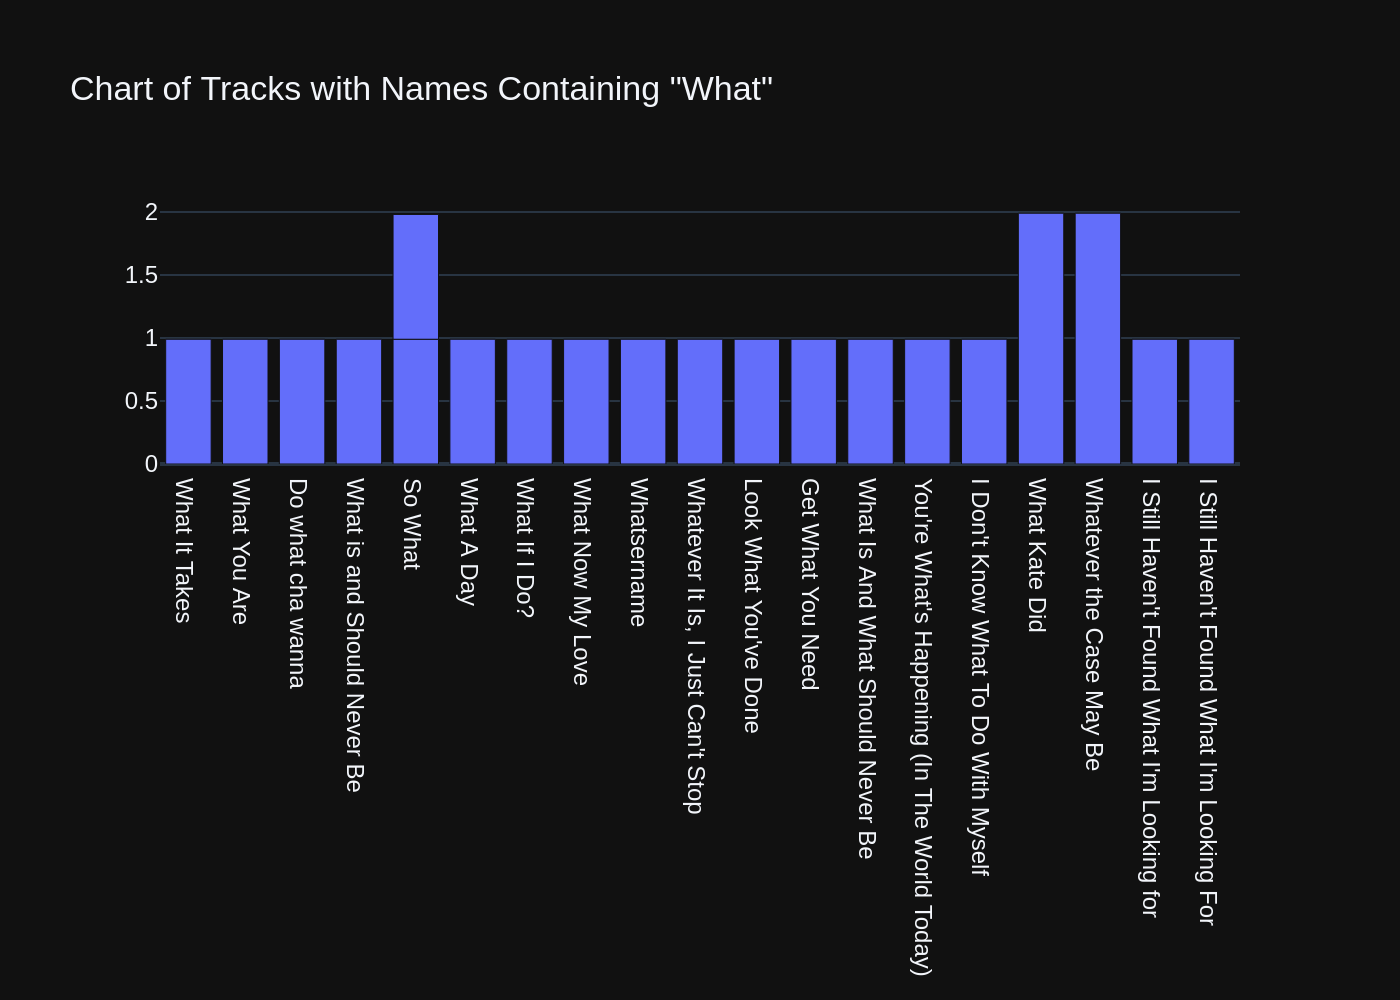





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, COUNT(*) as invoice_count FROM invoices GROUP BY CustomerId LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(*) as invoice_count FROM invoices GROUP BY CustomerId LIMIT 10;


[( <DataFrame> )]
queried dataframe



,CustomerId,invoice_count
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there's more than one unique customer ID to determine if we need a bar chart or an indicator.
if df['CustomerId'].nunique() > 1:
    # Bar chart for multiple customers
    fig = go.Figure(data=[go.Bar(x=df['CustomerId'], y=df['invoice_count'])])
    fig.update_layout(title='Number of Invoices per Customer', xaxis_title='Customer ID', yaxis_title='Invoice Count')
else:
    # Indicator for a single customer
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['invoice_count'].iloc[0],
        title={'text': "Total Invoices"},
        delta={'reference': 100, 'increasing': {'color': "red"}, 'decreasing': {'color': "green"}},
    ))

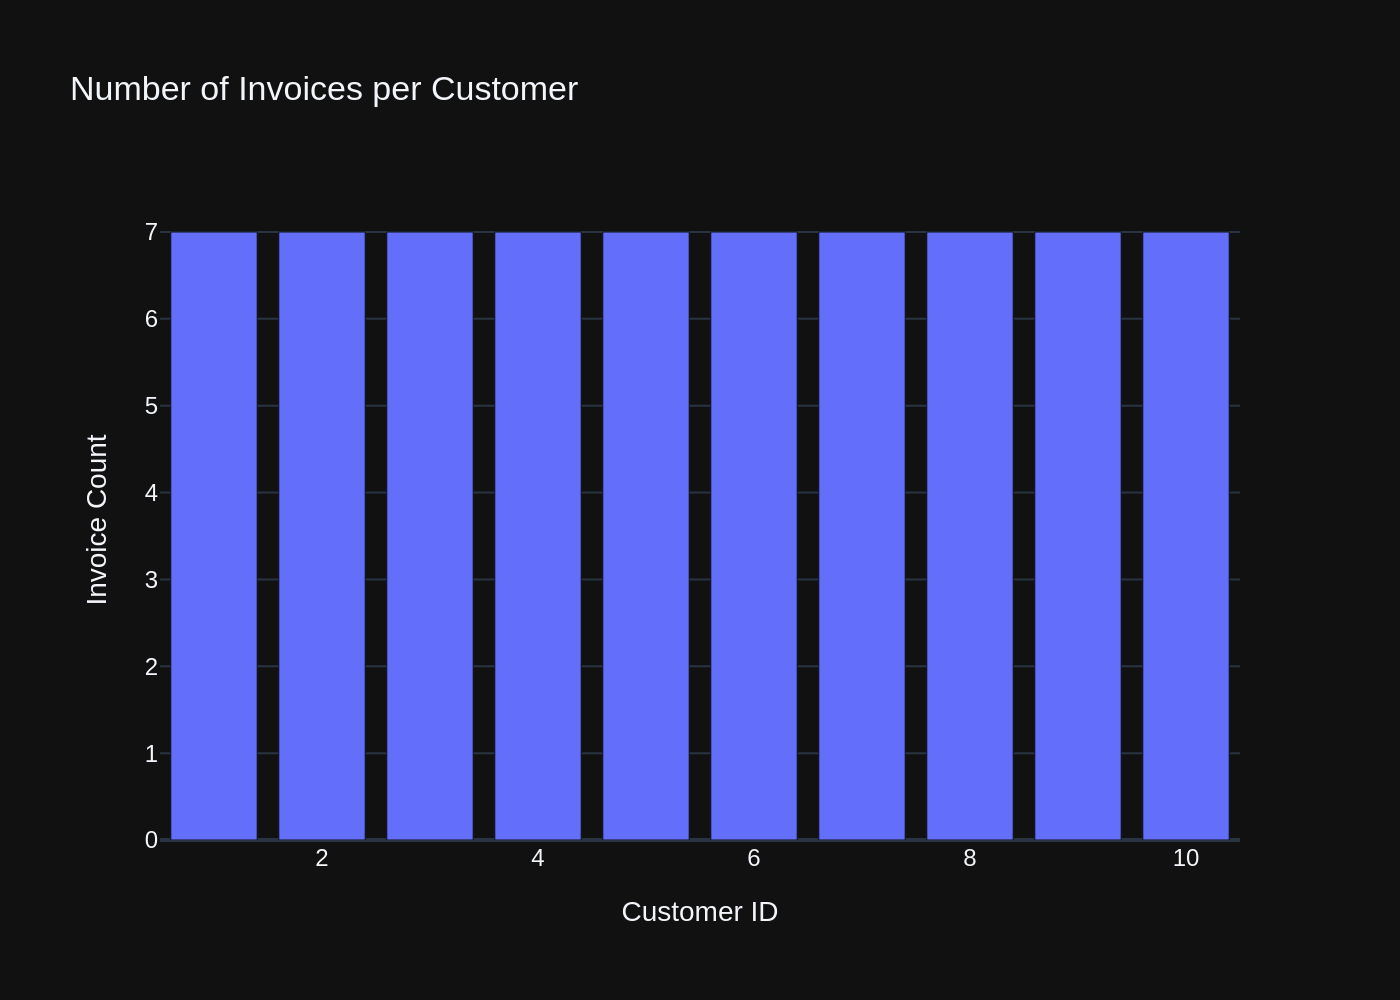





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT BillingCountry, COUNT(*) as invoice_count FROM invoices GROUP BY BillingCountry;


[( <SQL> )]
generated SQL statement



SELECT BillingCountry, COUNT(*) as invoice_count FROM invoices GROUP BY BillingCountry;


[( <DataFrame> )]
queried dataframe



,BillingCountry,invoice_count
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['invoice_count'].iloc[0],
        title={"text": "Invoice Count"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = px.bar(df, x='BillingCountry', y='invoice_count', title="Total Invoices Per Country")

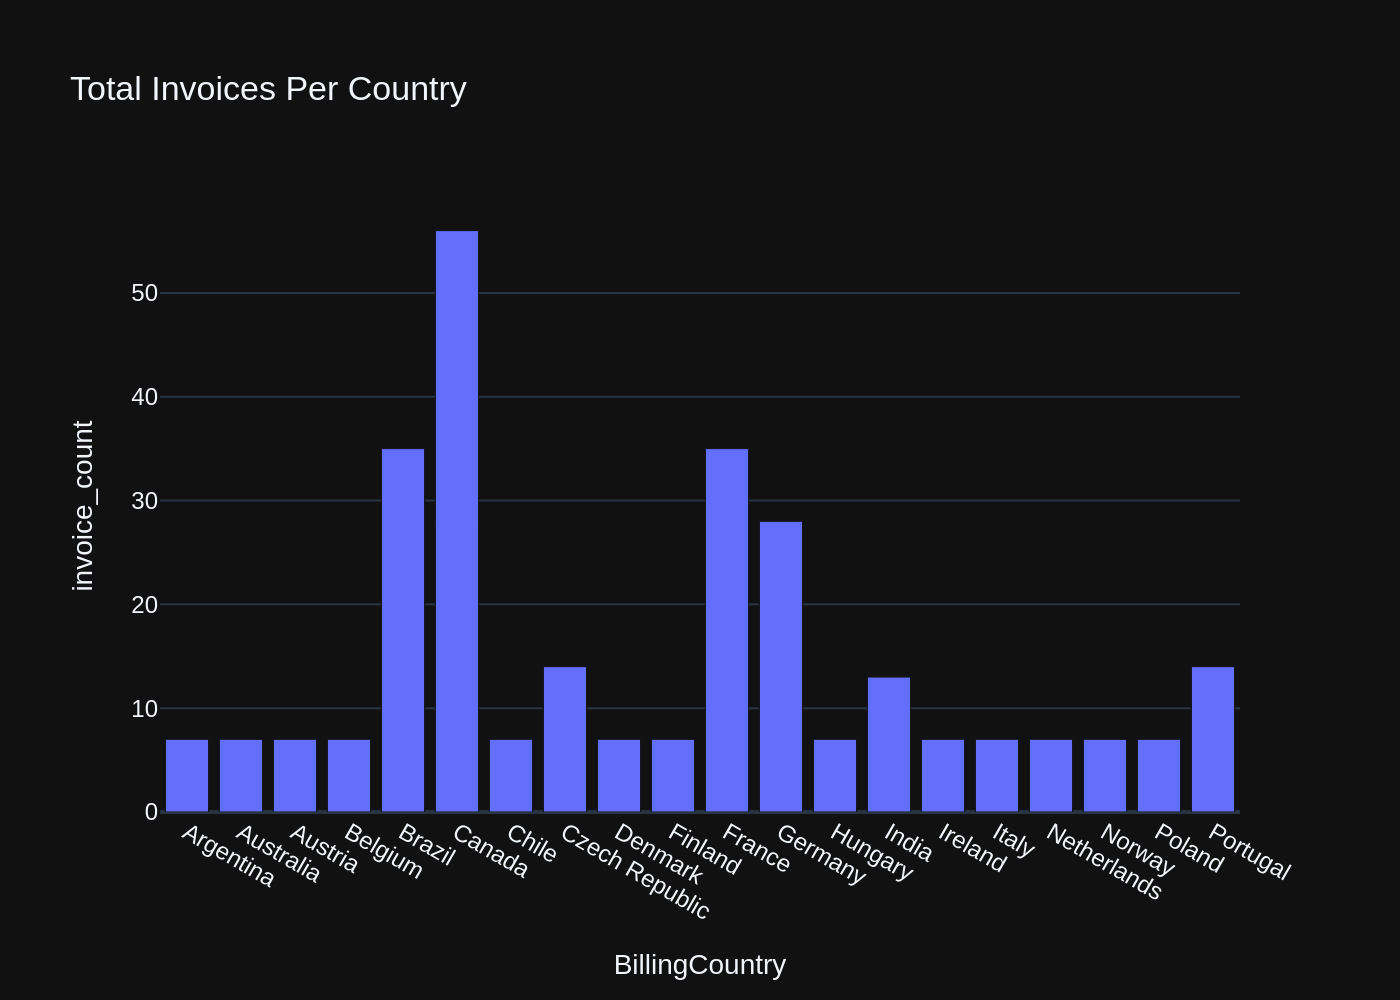





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM invoices WHERE Total > 10 LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE Total > 10 LIMIT 20;


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there's only one row in the DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="gauge",
        value=df.iloc[0]['Total'],
        title={'text': "Invoice Total"},
        gauge={'axis': {'range': [None, max(df['Total'])]}}
    ))
else:
    # Assuming 'InvoiceDate' is the datetime column
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['InvoiceDate'], y=df['Total'], mode='lines+markers'))

fig.update_layout(title_text='Invoices with Total Exceeding $10')

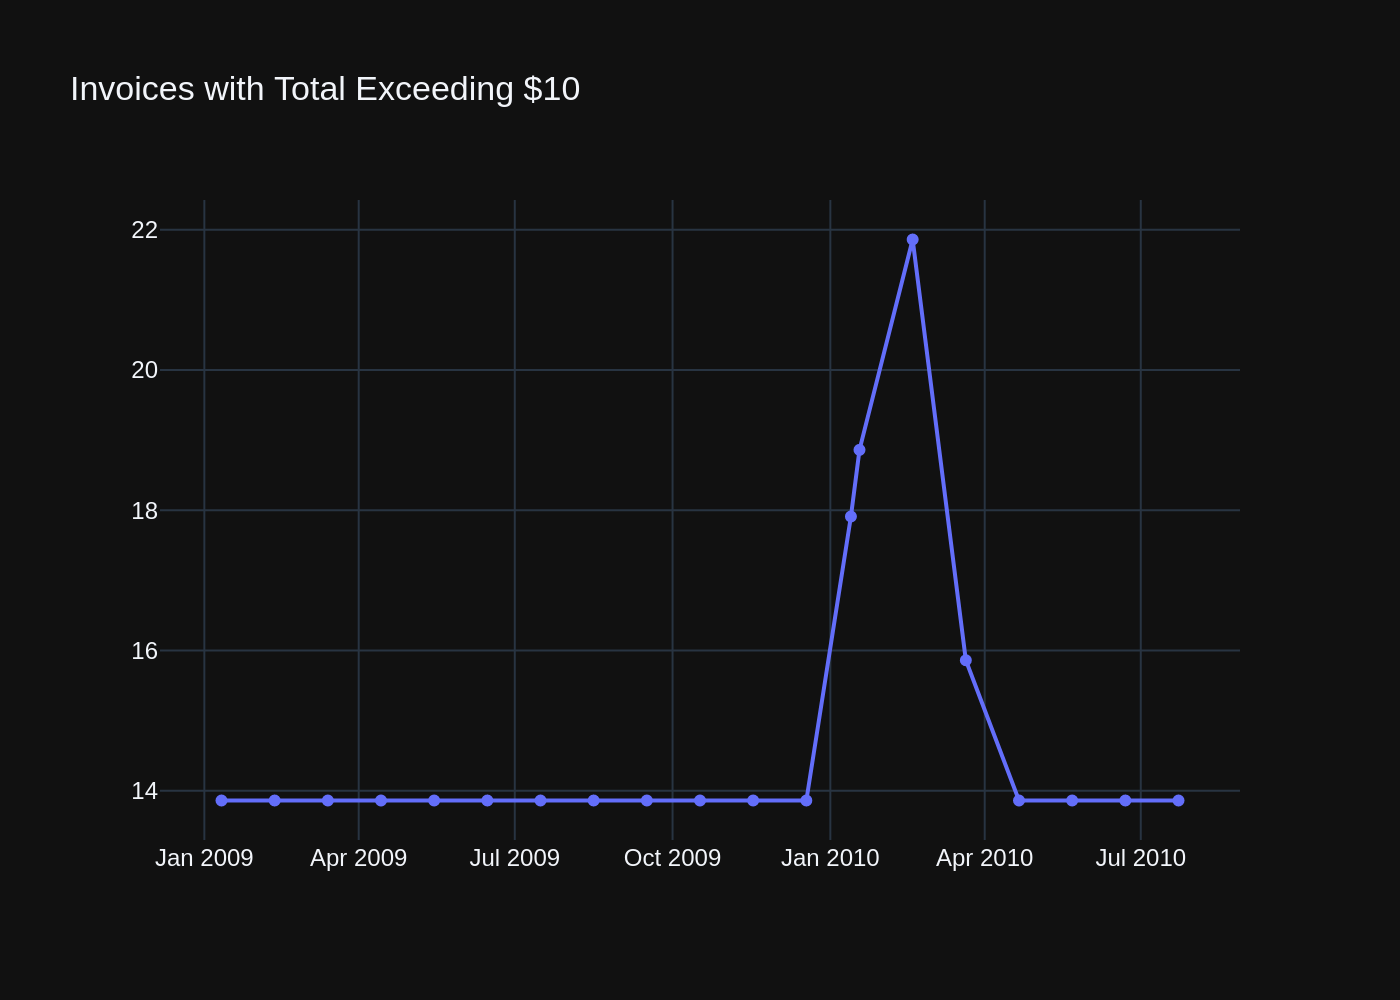





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT InvoiceId, Total FROM invoices WHERE strftime('%Y',InvoiceDate) > '2010';


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, Total FROM invoices WHERE strftime('%Y',InvoiceDate) > '2010';


[( <DataFrame> )]
queried dataframe



,InvoiceId,Total
0,167,0.99
1,168,1.98
2,169,1.98
3,170,3.96
4,171,5.94
5,172,8.91
6,173,13.86
7,174,0.99
8,175,1.98
9,176,1.98



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Create a list of invoice IDs and totals
invoice_ids = df['InvoiceId'].tolist()
totals = df['Total'].tolist()

if len(invoice_ids) == 1:
    # If there is only one value, create an indicator chart
    fig = go.Figure(go.Indicator(
        mode="number",
        value=totals[0],
        title={"text": "Total Invoiced"}
    ))
else:
    # Create a bar chart
    fig = go.Figure(data=[go.Bar(x=invoice_ids, y=totals)])
    fig.update_layout(title='Invoice Totals Since 2010')

# Display the plot

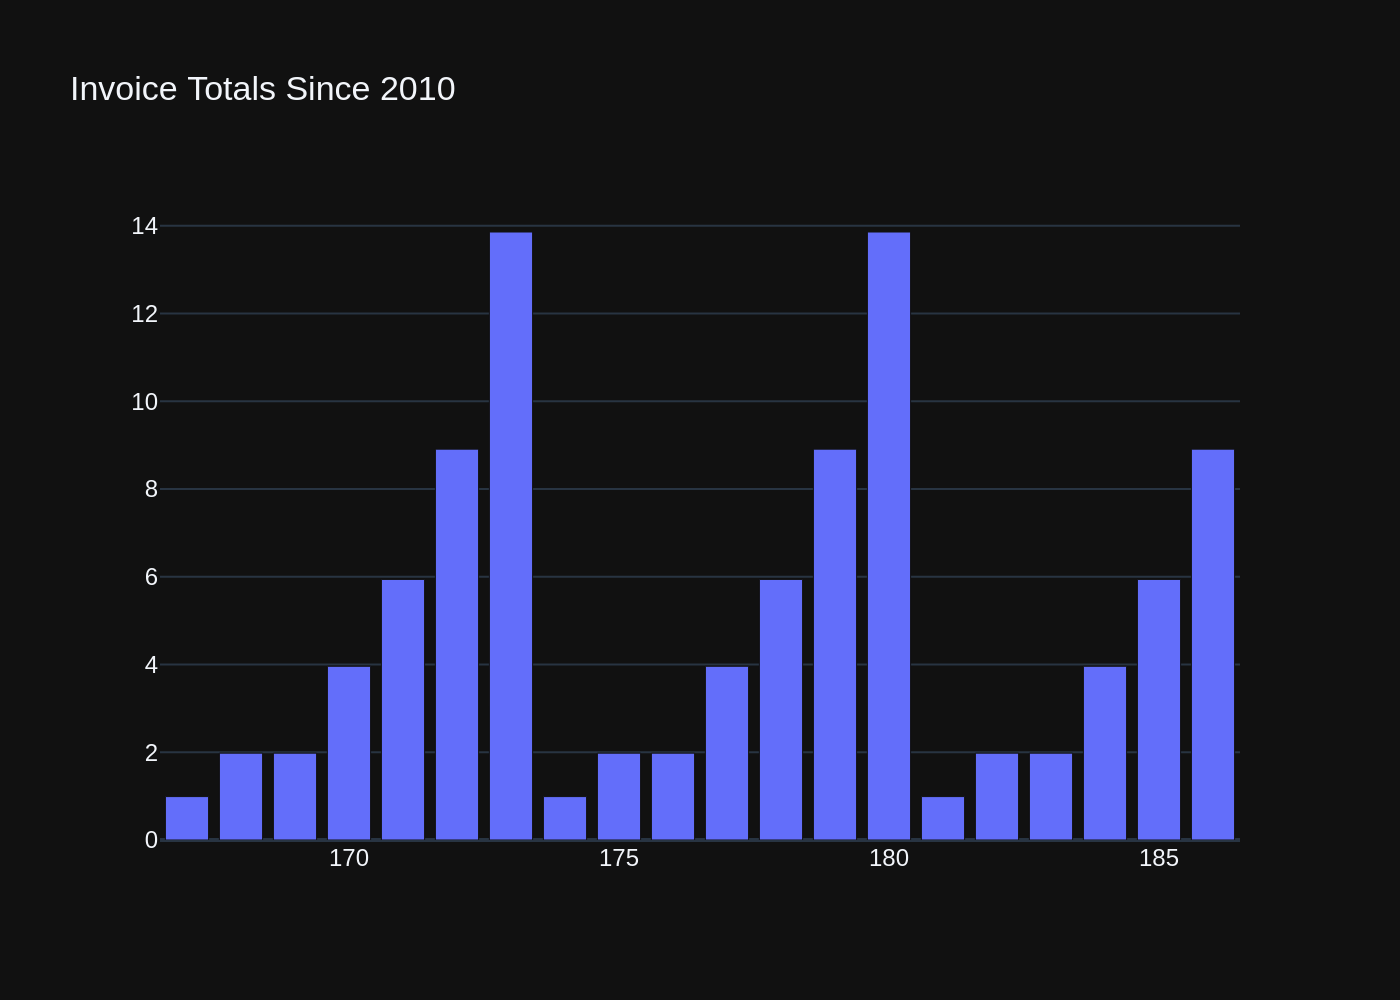





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT e1.FirstName, e2.FirstName AS ManagerFirstName FROM employees AS e1 JOIN employees AS e2 ON e1.ReportsTo = e2.EmployeeId;


[( <SQL> )]
generated SQL statement



SELECT e1.FirstName, e2.FirstName AS ManagerFirstName FROM employees AS e1 JOIN employees AS e2 ON e1.ReportsTo = e2.EmployeeId;


[( <DataFrame> )]
queried dataframe



,FirstName,ManagerFirstName
0,Nancy,Andrew
1,Jane,Nancy
2,Margaret,Nancy
3,Steve,Nancy
4,Michael,Andrew
5,Robert,Michael
6,Laura,Michael



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there are multiple values in the DataFrame
if len(df) > 1:
    fig = px.bar(df, x='FirstName', y='ManagerFirstName', orientation='h')
else:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['ManagerFirstName'],
        title={'text': "Reporting Manager"},
    ))

fig.update_layout(height=500)

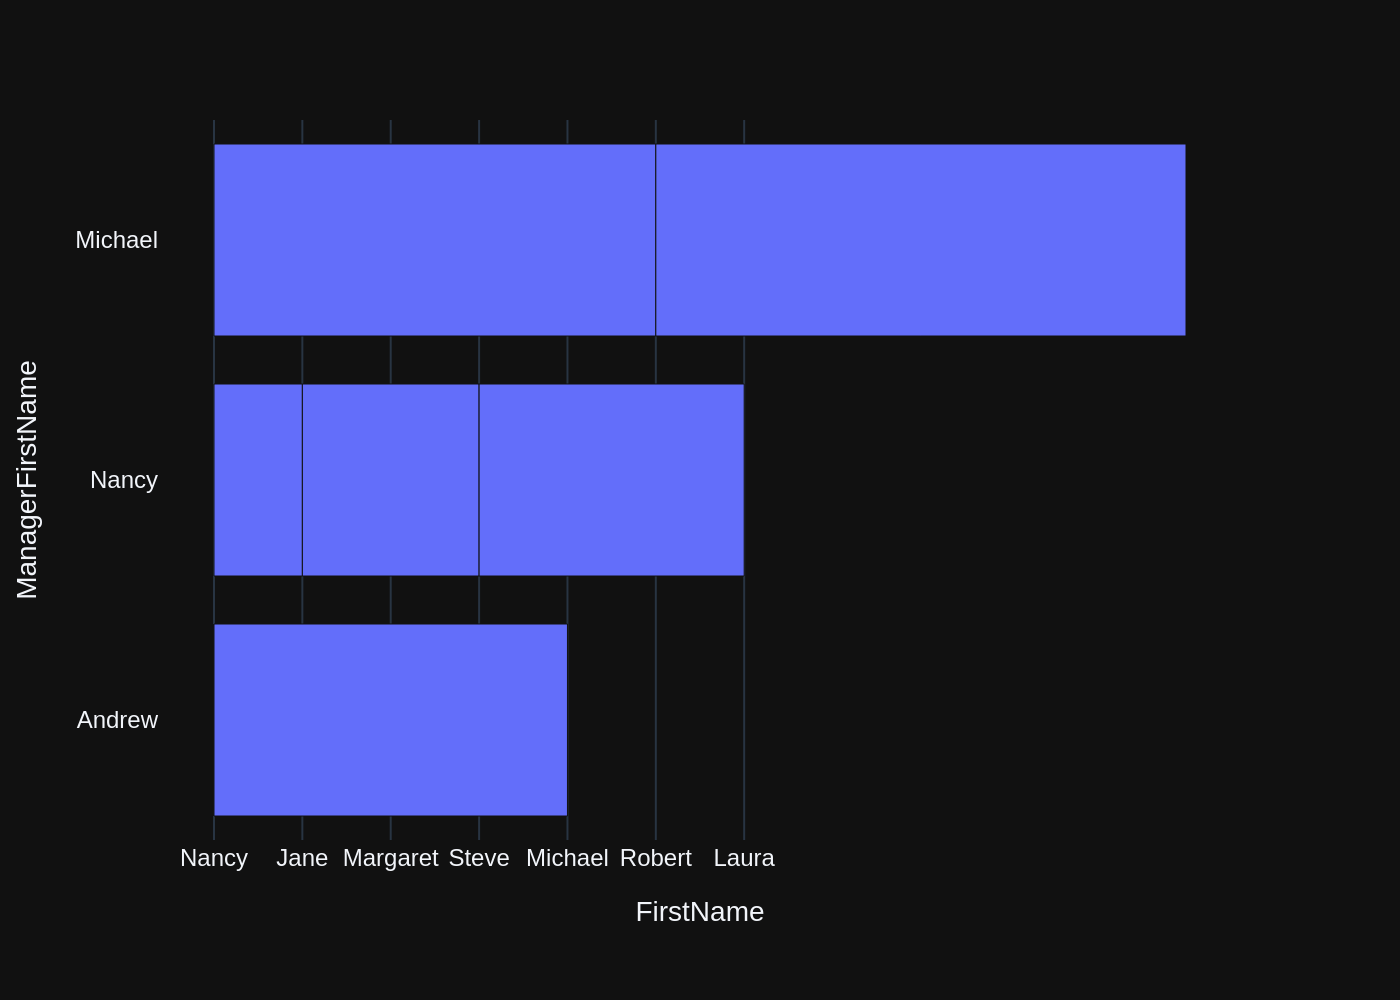





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, AVG(Total) as avg_total FROM invoices GROUP BY CustomerId LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, AVG(Total) as avg_total FROM invoices GROUP BY CustomerId LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,avg_total
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df contains the columns 'CustomerId' and 'avg_total'
fig = px.scatter(df, x='CustomerId', y='avg_total', title='Average Invoice Total by Customer')
fig.update_layout(xaxis_title='Customer ID', yaxis_title='Average Total')

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=df['avg_total'].iloc[0],
        title={'text': "Average Invoice Total"},
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={
            'axis': {'range': [None, max(df['avg_total'])]},
            'bar': {'color': "black"},
            'steps': [
                {'range': [0, 5], 'color': "green"},
                {'range': [5, 10], 'color': "yellow"},
                {'range': [10, max(df['avg_total'])], 'color': "red"}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': df['avg_total'].iloc[0]
            }
        }
    ))

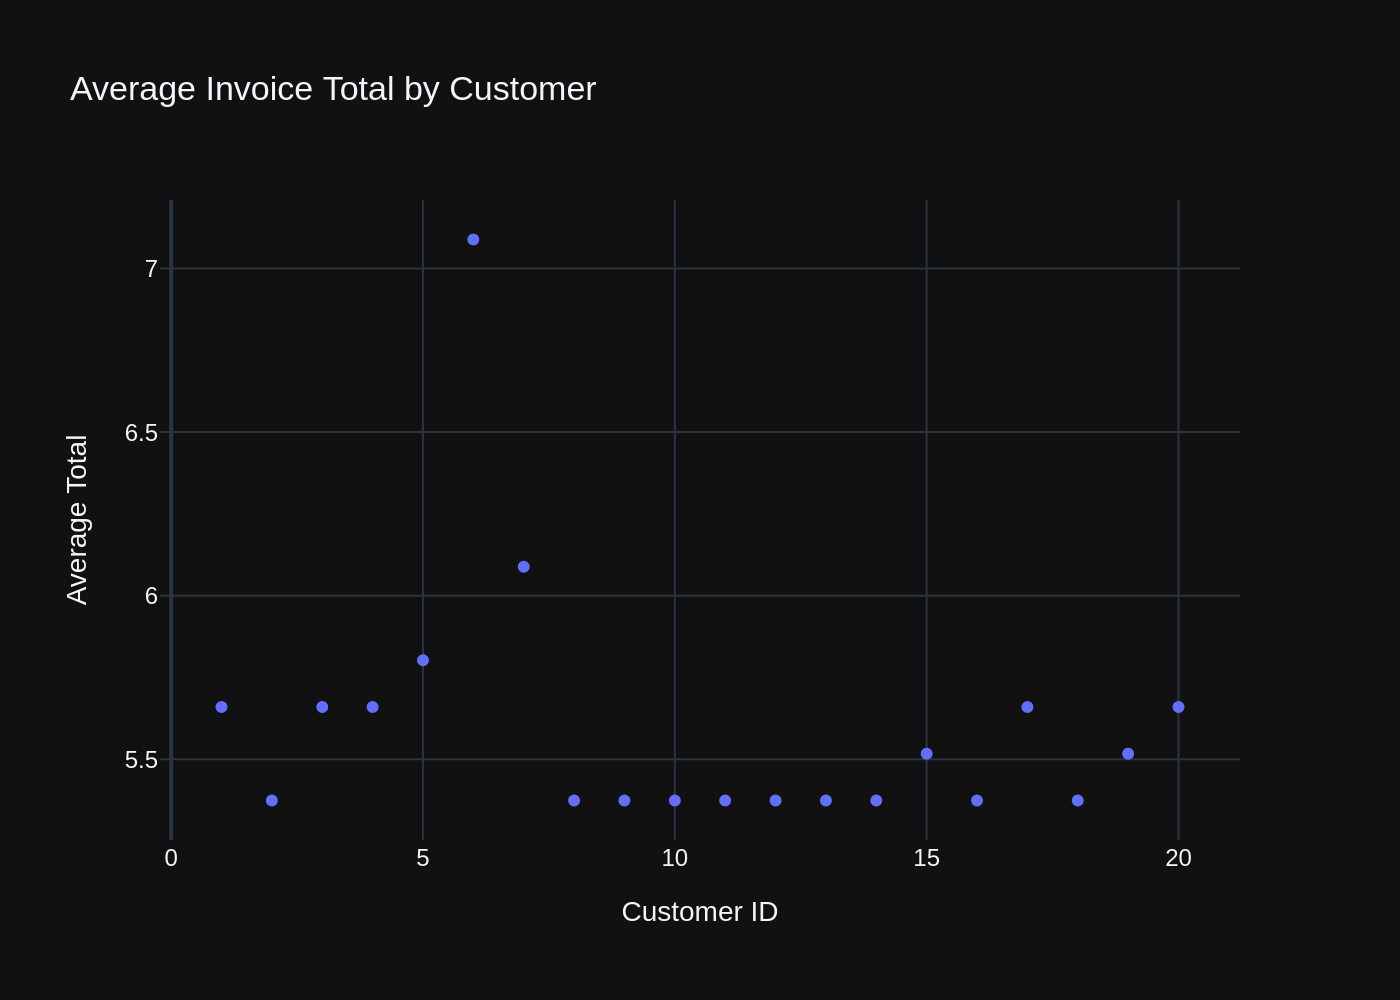





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM tracks ORDER BY UnitPrice DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT * FROM tracks ORDER BY UnitPrice DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99
1,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
2,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99
3,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99
4,2823,Collaborators,227,3,19,None,2626626,483484911,1.99



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Assuming df contains the result of the query, and it has columns for TrackId and UnitPrice
if len(df) == 1:
    # Create an indicator plot
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['UnitPrice'],
        title={'text': "Most Expensive Track"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    # Create a bar chart
    fig = go.Figure(data=[
        go.Bar(name='Tracks', x=df['TrackId'], y=df['UnitPrice'])
    ])

    # Customize layout
    fig.update_layout(
        title_text='Top 5 Most Expensive Tracks',
        xaxis_title='Track ID',
        yaxis_title='Unit Price'
    )

# Show the figure

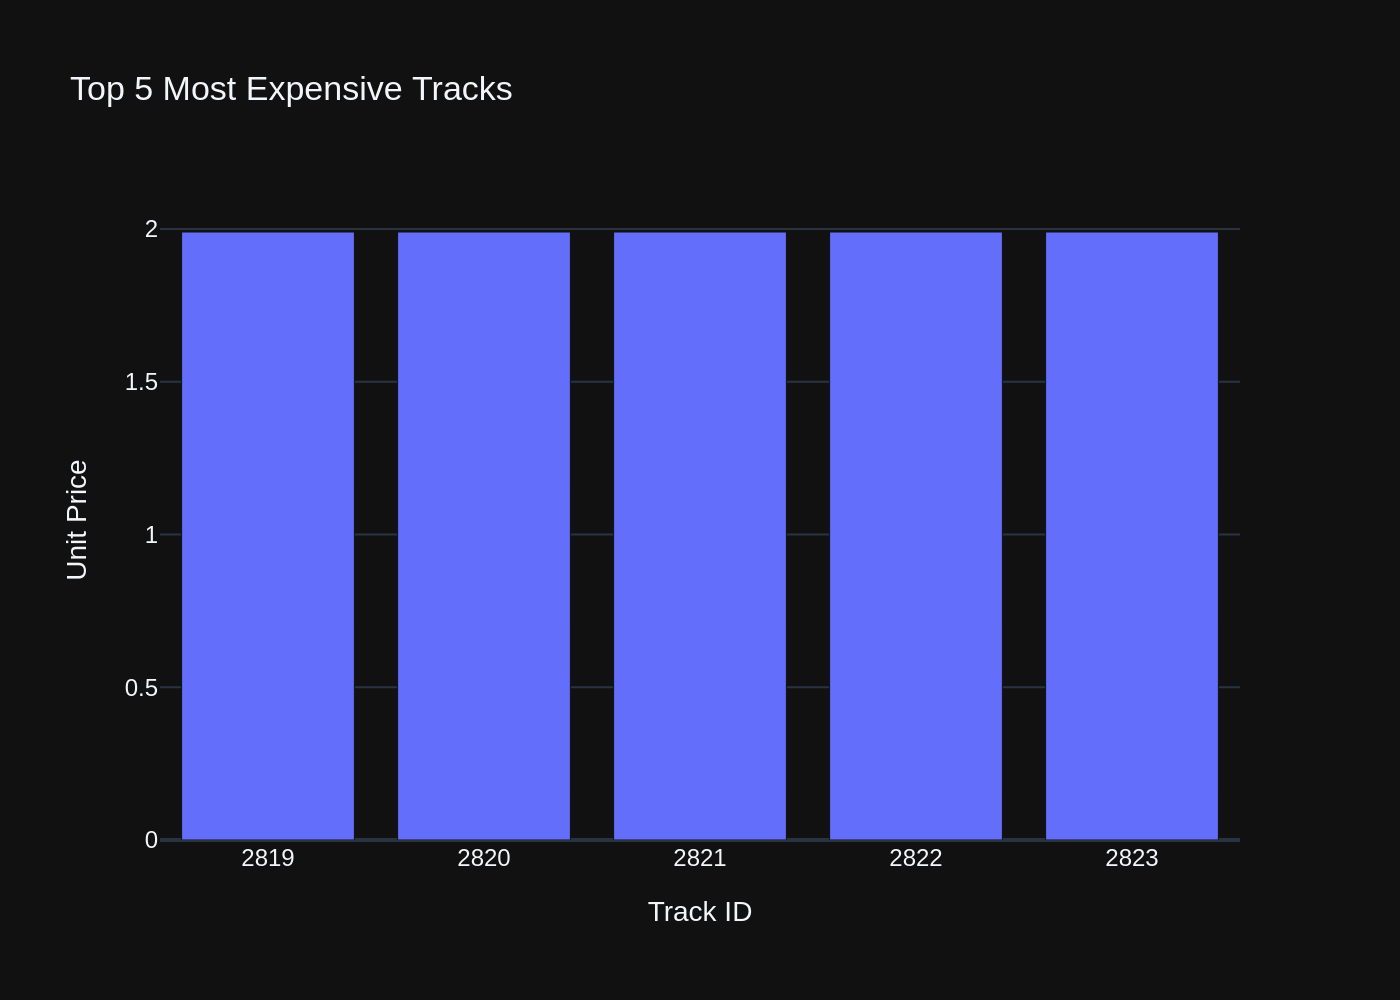





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT g.Name, COUNT(*) as num_tracks FROM genres AS g JOIN tracks AS t ON g.GenreId = t.GenreId GROUP BY g.Name LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT g.Name, COUNT(*) as num_tracks FROM genres AS g JOIN tracks AS t ON g.GenreId = t.GenreId GROUP BY g.Name LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name,num_tracks
0,Alternative,40
1,Alternative & Punk,332
2,Blues,81
3,Bossa Nova,15
4,Classical,74
5,Comedy,17
6,Drama,64
7,Easy Listening,24
8,Electronica/Dance,30
9,Heavy Metal,28



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if the DataFrame has more than one genre
if len(df) > 1:
    # Create a bar chart
    fig = go.Figure(go.Bar(
        x=df['Name'],
        y=df['num_tracks'],
        name='Number of Tracks',
        marker=dict(color='royalblue')
    ))

    # Set the title and axis labels
    fig.update_layout(title='Number of Tracks per Genre', xaxis_title='Genre', yaxis_title='Number of Tracks')

    # Show the plot
    
else:
    # Create an indicator chart
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['num_tracks'].values[0],
        title={'text': "Total Tracks"},
        number={'valueformat': 'd'}
    ))

    # Show the plot

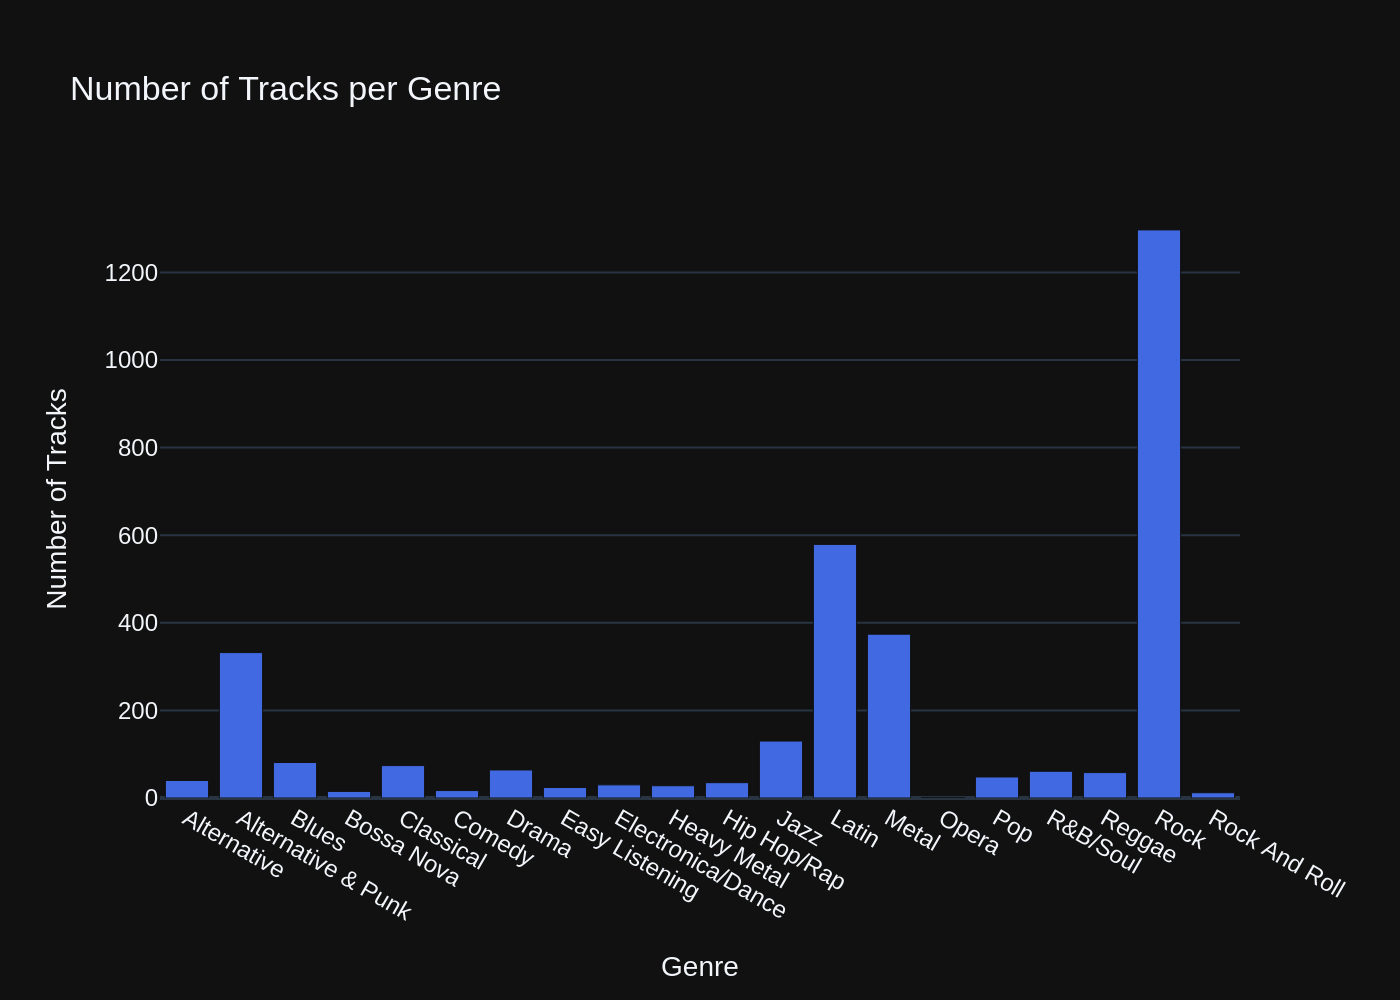





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT g.Name FROM genres AS g LEFT JOIN tracks AS t ON g.GenreId = t.GenreId WHERE t.GenreId IS NULL LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT g.Name FROM genres AS g LEFT JOIN tracks AS t ON g.GenreId = t.GenreId WHERE t.GenreId IS NULL LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM genres WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM tracks) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM genres WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM tracks) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,GenreId,Name



[( RETRY )]
***** 2 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM genres AS g WHERE NOT EXISTS (SELECT * FROM tracks AS t WHERE g.GenreId = t.GenreId) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM genres AS g WHERE NOT EXISTS (SELECT * FROM tracks AS t WHERE g.GenreId = t.GenreId) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,GenreId,Name



[( RETRY )]
***** 3 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT g.Name FROM genres AS g LEFT JOIN tracks AS t ON g.GenreId = t.GenreId WHERE t.TrackId IS NULL LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT g.Name FROM genres AS g LEFT JOIN tracks AS t ON g.GenreId = t.GenreId WHERE t.TrackId IS NULL LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name






# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 1 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT(CustomerId) FROM invoices)


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 2 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT(CustomerId) FROM invoices);


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT(CustomerId) FROM invoices);


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 3 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT CustomerId FROM invoices) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT CustomerId FROM invoices) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Name, COUNT(*) as num_tracks FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId GROUP BY a.Name ORDER BY num_tracks DESC LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT a.Name, COUNT(*) as num_tracks FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId GROUP BY a.Name ORDER BY num_tracks DESC LIMIT 10;


[( <DataFrame> )]
queried dataframe



,Name,num_tracks
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

def generate_plot(df):
    if len(df) == 1:
        return generate_indicator(df)
    else:
        return generate_bar_chart(df)

def generate_indicator(df):
    indicator = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = df.iloc[0]['num_tracks'],
        title = {'text': f"{df.iloc[0]['Name']}"},
        gauge = {
            'axis': {'range': [None, max(df['num_tracks'])]},
            'steps' : [
                {'range': [0, max(df['num_tracks'])], 'color': "lightgray"}],
            'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75}}))
    return indicator

def generate_bar_chart(df):
    bar_chart = go.Figure(data=[go.Bar(x=df['Name'], y=df['num_tracks'])])
    bar_chart.update_layout(title='Top 10 Most Popular Artists')
    bar_chart.update_xaxes(categoryorder="total ascending")
    return bar_chart


[( RETRY )]
***** 1 *****


Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Name, COUNT(*) as num_tracks FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId GROUP BY a.Name ORDER BY num_tracks DESC LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT a.Name, COUNT(*) as num_tracks FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId GROUP BY a.Name ORDER BY num_tracks DESC LIMIT 10;


[( <DataFrame> )]
queried dataframe



,Name,num_tracks
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Create figure
fig = go.Figure()

if len(df) == 1:
    # Use Indicator chart if there is only one value in the dataframe
    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = df['num_tracks'].iloc[0],
        title = {"text": df['Name'].iloc[0]},
        delta = {"reference": 100000}, # You may need to adjust this reference value based on your data
    ))
else:
    # Use Bar chart for multiple values in the dataframe
    fig.add_trace(go.Bar(
        x=df['Name'],
        y=df['num_tracks']
    ))

# Update layout
fig.update_layout(title="Top 10 Most Popular Artists",
                  xaxis_title="Artist Name",
                  yaxis_title="Number of Tracks")

# Show plot

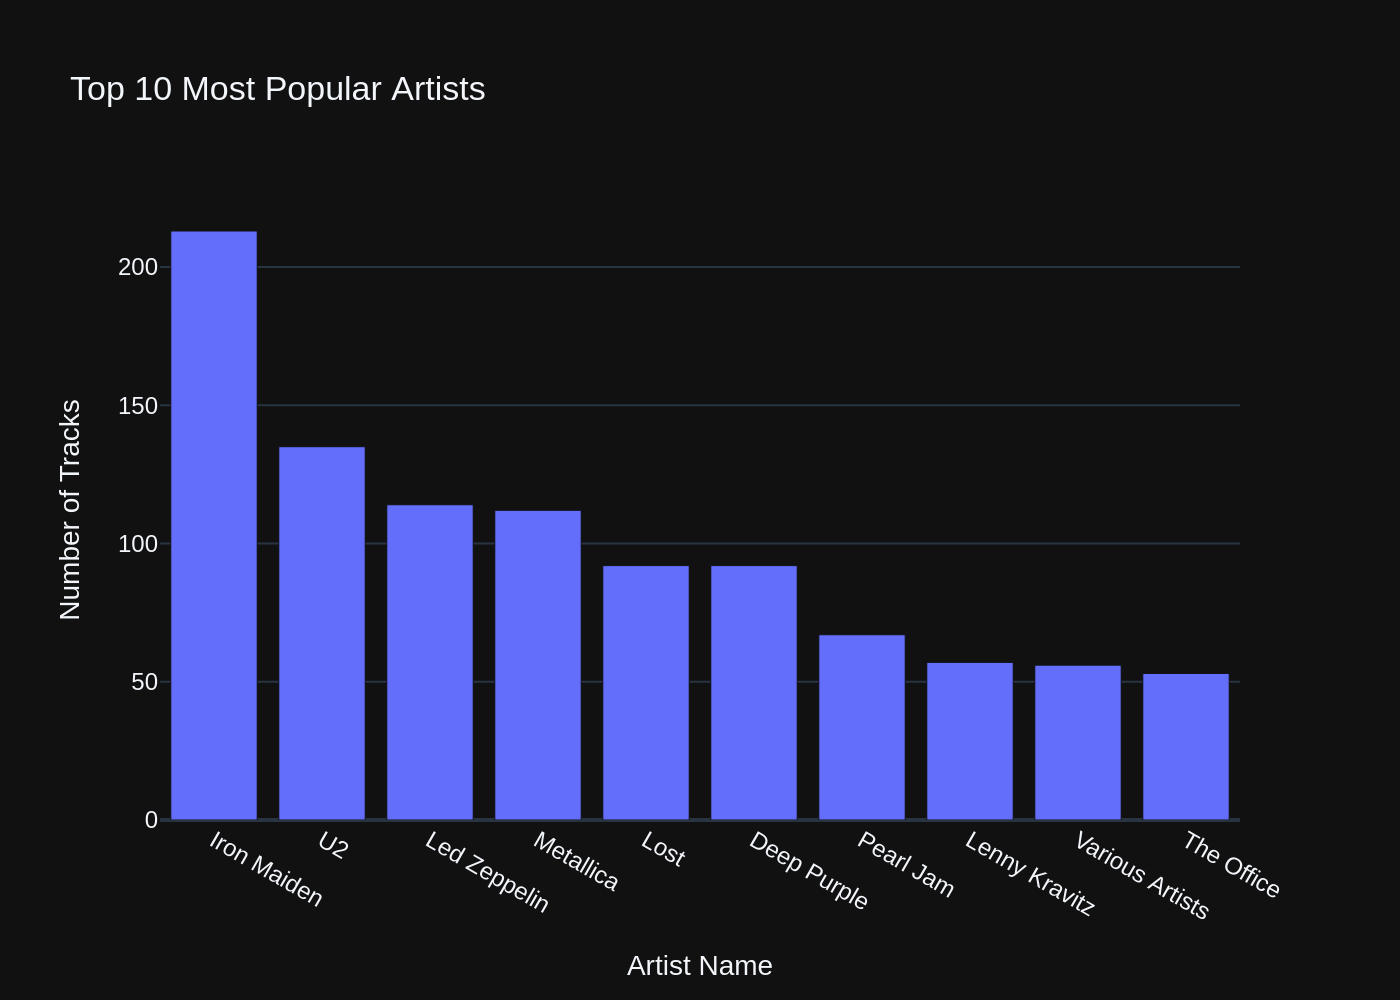





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Email, City FROM customers WHERE Country = 'Canada' LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT Email, City FROM customers WHERE Country = 'Canada' LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Email,City
0,ftremblay@gmail.com,Montréal
1,mphilips12@shaw.ca,Edmonton
2,jenniferp@rogers.ca,Vancouver
3,robbrown@shaw.ca,Toronto
4,edfrancis@yachoo.ca,Ottawa
5,marthasilk@gmail.com,Halifax
6,aaronmitchell@yahoo.ca,Winnipeg
7,ellie.sullivan@shaw.ca,Yellowknife



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add trace for Email
fig.add_trace(go.Indicator(
    mode="number",
    value=df['Email'].count(),
    title={'text': "Email Count"},
))

# Show figure

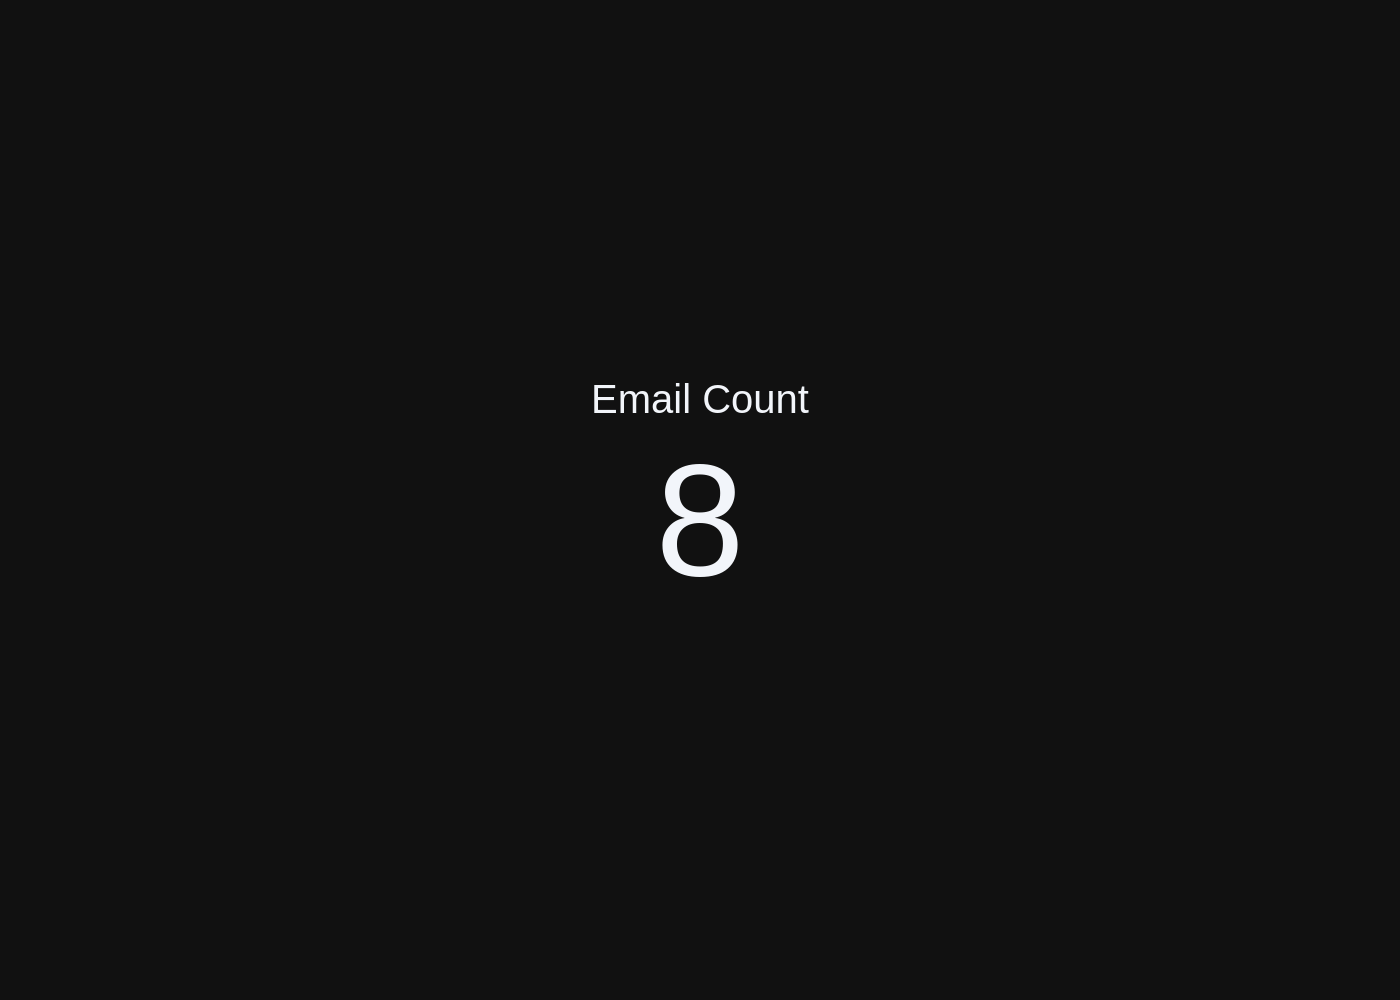





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, COUNT(*) as invoice_count FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId ORDER BY invoice_count DESC LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, COUNT(*) as invoice_count FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId ORDER BY invoice_count DESC LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,invoice_count
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Create figure
fig = go.Figure()

if len(df) == 1:
    fig.add_trace(go.Indicator(
        mode="number",
        value=df.iloc[0]['invoice_count'],
        title={"text": "Most Invoices<br>by Customer"},
        domain={"row": 0, "column": 0}
    ))
else:
    for i, row in df.iterrows():
        fig.add_trace(go.Bar(
            x=[row['CustomerId']],
            y=[row['invoice_count']],
            name=str(row['CustomerId'])
        ))

# Update layout
fig.update_layout(title="Customer Invoices", barmode='group')

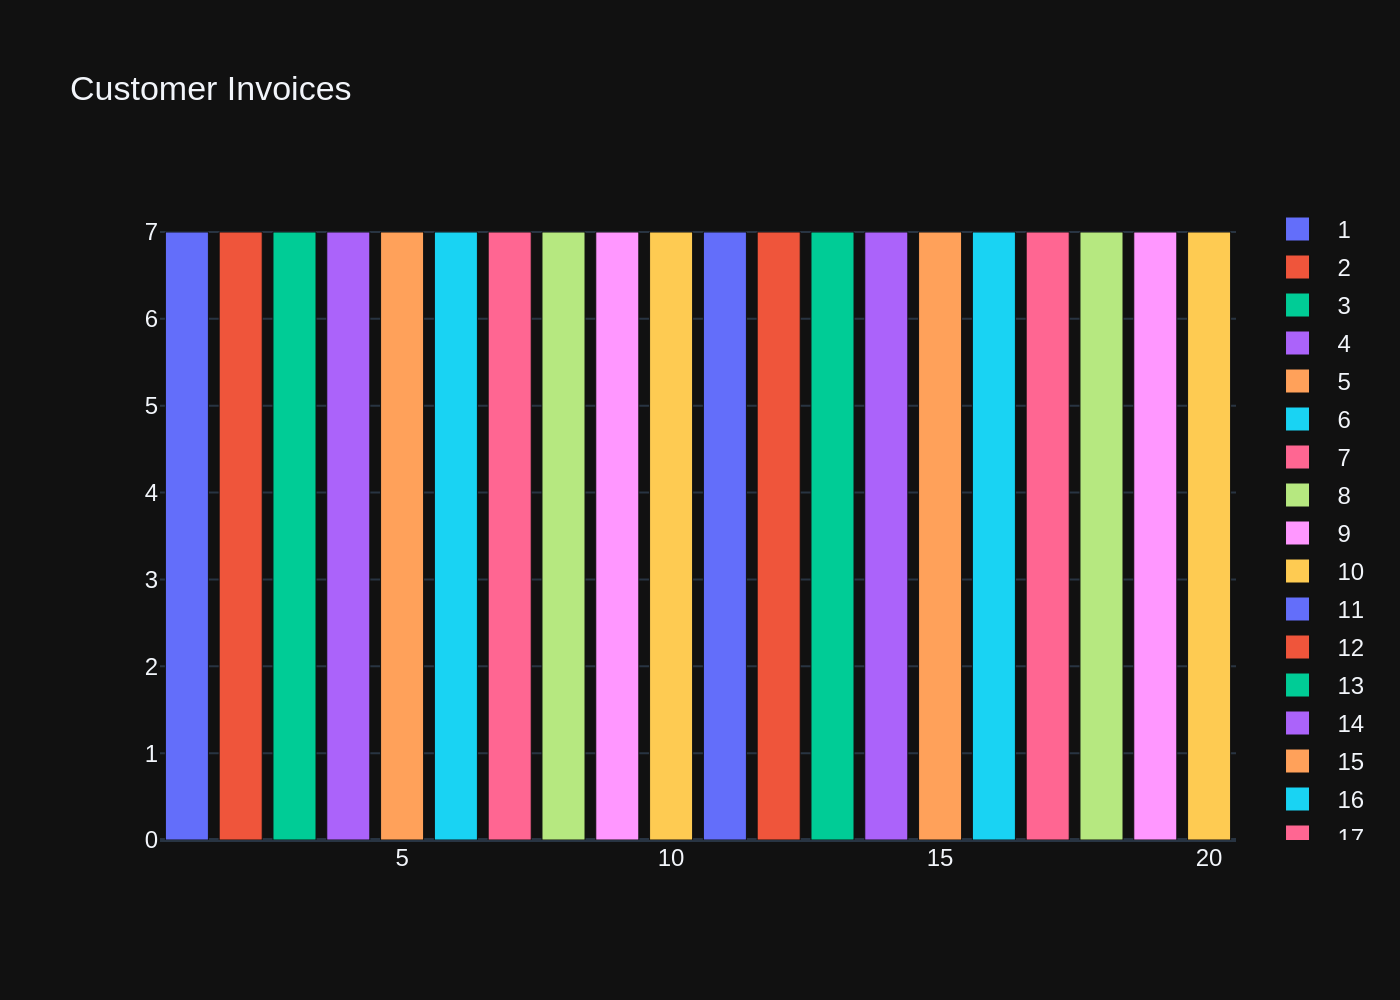





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.FirstName, c.LastName, SUM(ii.Quantity) as total_quantity FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId ORDER BY total_quantity DESC LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(ii.Quantity) as total_quantity FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId ORDER BY total_quantity DESC LIMIT 1;


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,total_quantity
0,Luís,Gonçalves,38



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['total_quantity'].values[0],
        title={"text": "Total Albums Purchased", "font": {"size": 24}},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df['FirstName'] + ' ' + df['LastName'],
        y=df['total_quantity']
    ))

fig.update_layout(title="Customer Who Bought the Most Albums",
                  xaxis_title="Customer",
                  yaxis_title="Total Quantity")

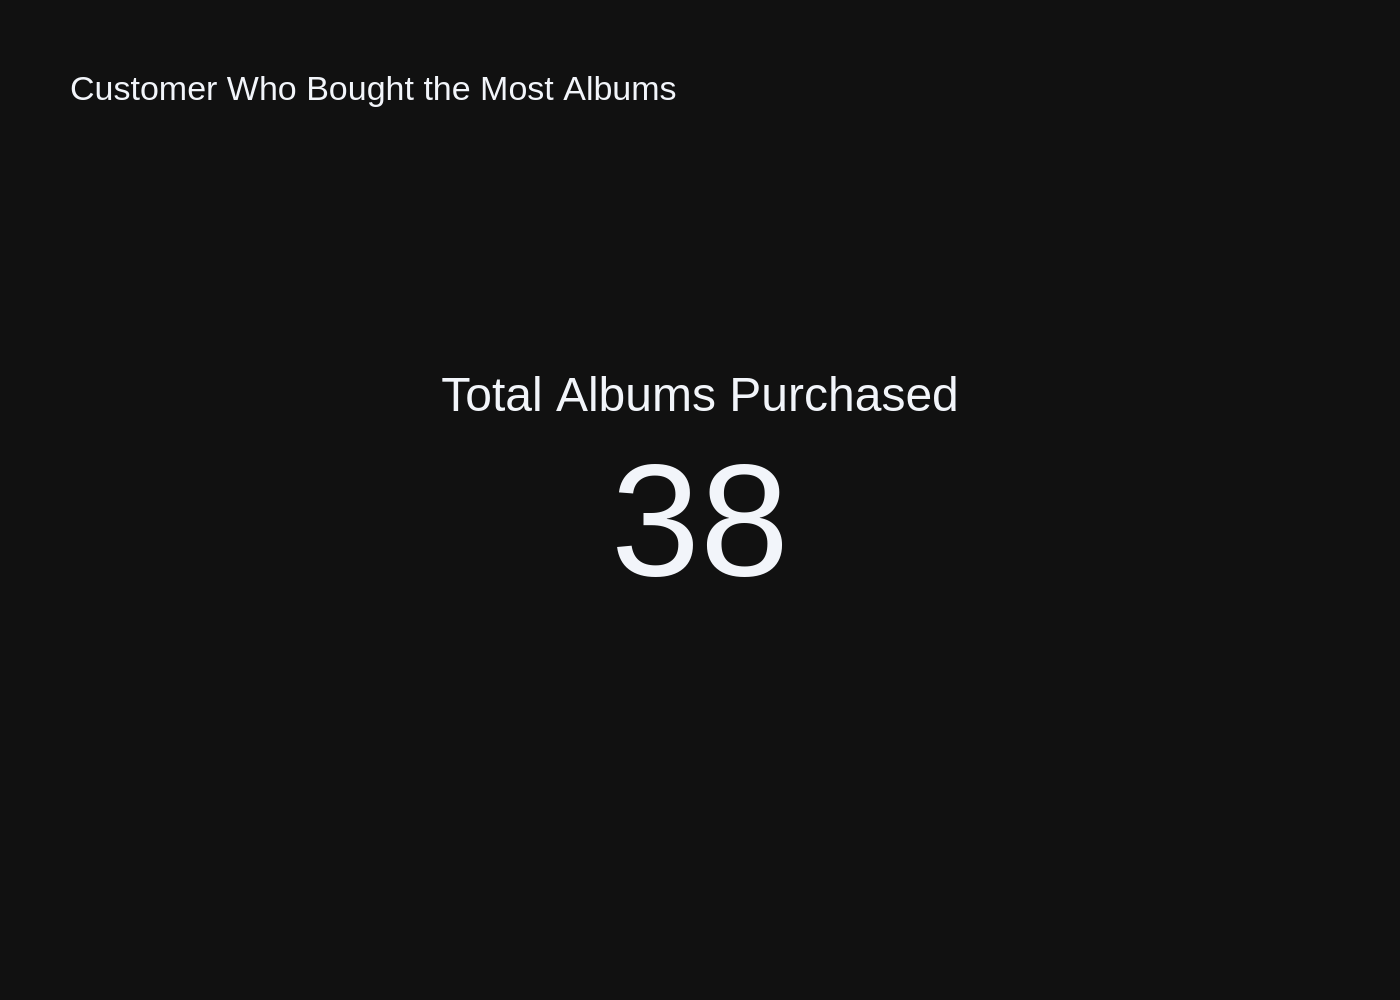





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.FirstName, c.LastName, COUNT(*) as album_count FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId ORDER BY album_count DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, COUNT(*) as album_count FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId ORDER BY album_count DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,album_count
0,Luís,Gonçalves,38
1,Leonie,Köhler,38
2,François,Tremblay,38
3,Bjørn,Hansen,38
4,František,Wichterlová,38



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there's only one entry in the dataframe
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=df['album_count'].iloc[0],
        title={'text': "Top Customer"},
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={
            'axis': {'range': [None, df['album_count'].max()]},
            'bar': {'color': "#000000"},
            'steps': [
                {'range': [0, 5], 'color': '#32CD32'},
                {'range': [5, 10], 'color': '#FFD700'}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 1,
                'value': df['album_count'].iloc[0]
            }
        },
        number={'suffix': " Albums"}
    ))
else:
    fig = go.Figure(go.Bar(
        x=df['FirstName'] + ' ' + df['LastName'],
        y=df['album_count'],
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>Albums: %{y}<extra></extra>',
        marker=dict(color='#009B77')
    ))

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': "Top 5 Customers by Album Quantity",
        'font_size': 24,
        'x': 0.5,
        'y': 0.95
    },
    xaxis=dict(title_text='Customer'),
    yaxis=dict(title_text='Album Quantity')
)

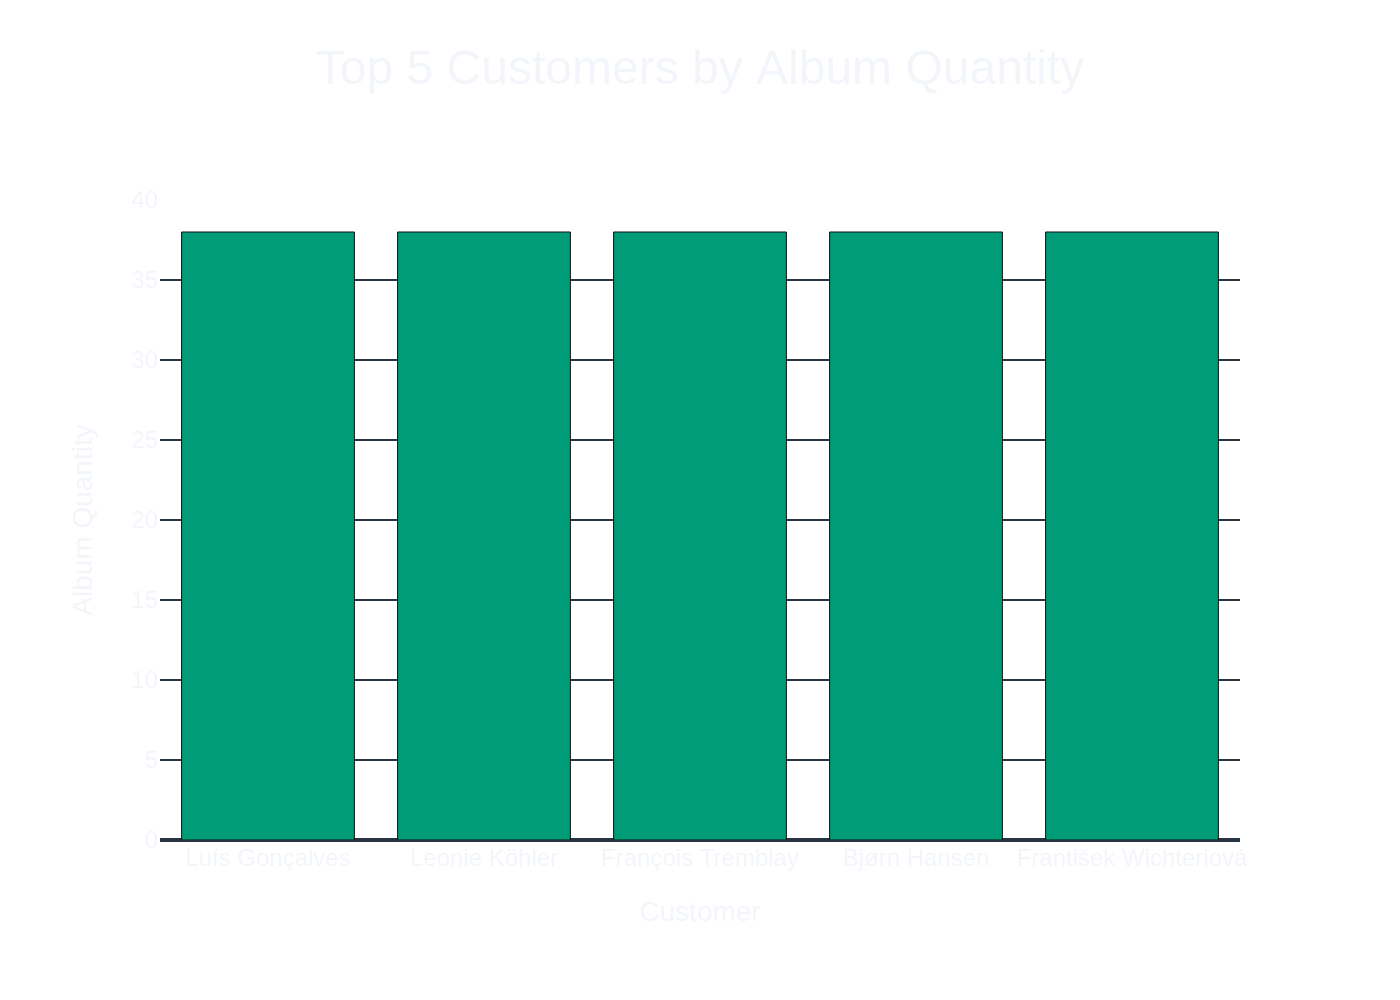





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, SUM(Total) as total_spent FROM invoices GROUP BY CustomerId ORDER BY total_spent DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, SUM(Total) as total_spent FROM invoices GROUP BY CustomerId ORDER BY total_spent DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,total_spent
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there's only one customer to display
if len(df) == 1:
    # Create an indicator chart
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df.iloc[0]['total_spent'],
        title={"text": "Total Spent", "font": {"size": 24}},
        delta={"reference": 0, "relative": True},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    # Create a bar chart
    fig = go.Figure(data=[
        go.Bar(x=df['CustomerId'], y=df['total_spent'])
    ])

# Update layout for the chart
fig.update_layout(
    title="Top 5 Customers Who Spent the Most Money",
    xaxis_title="Customer ID",
    yaxis_title="Total Spent"
)

# Show the plot

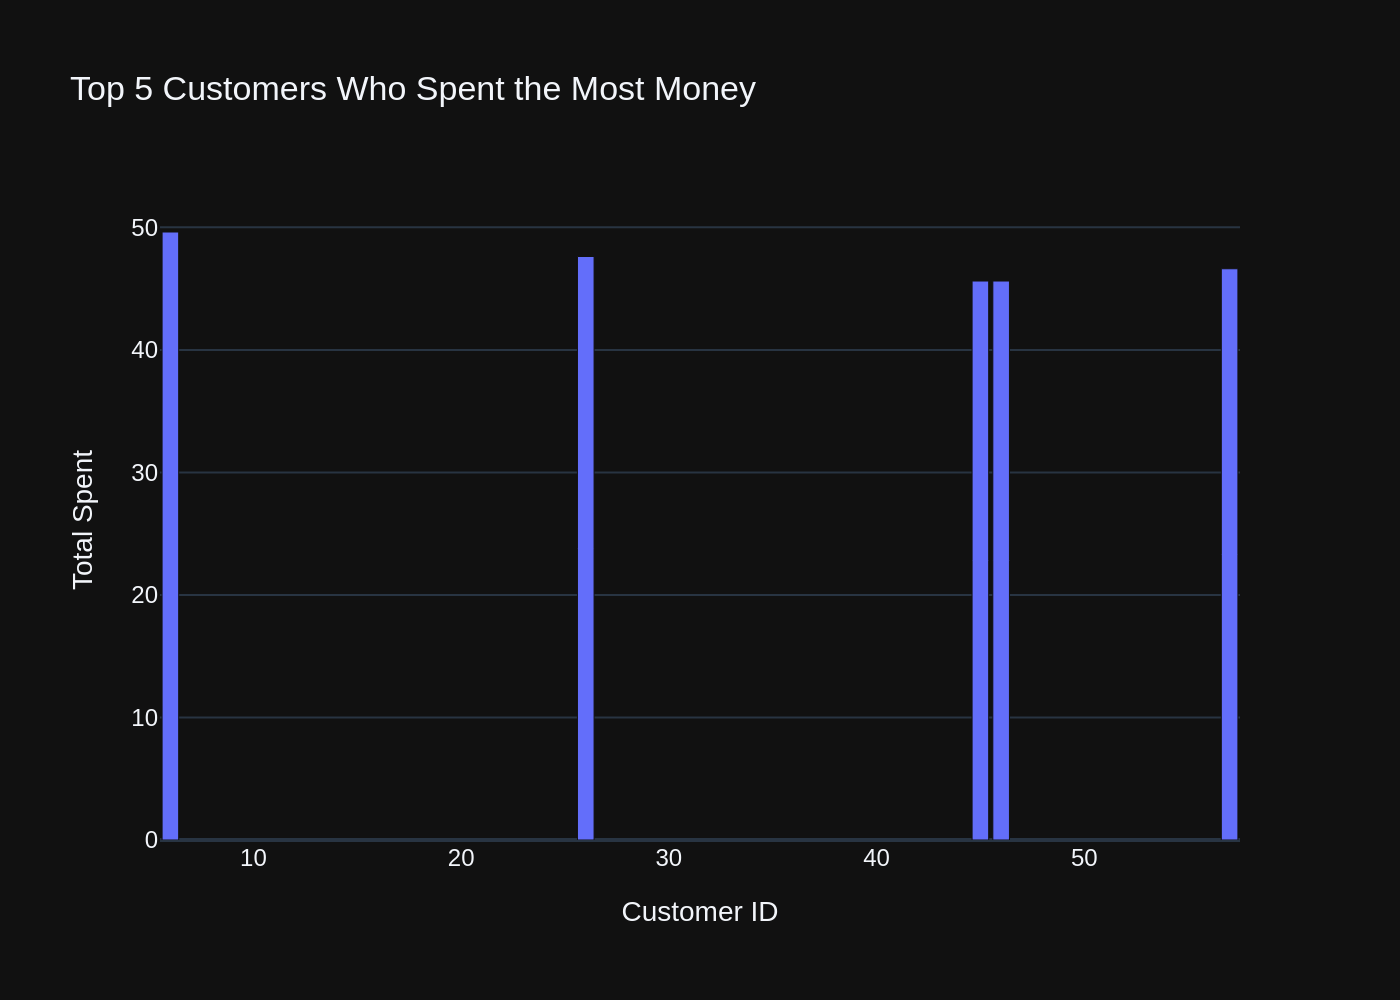





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT p.Name, SUM(t.Milliseconds) as playlist_duration FROM playlists AS p JOIN playlist_track AS pt ON p.PlaylistId = pt.PlaylistId JOIN tracks AS t ON pt.TrackId = t.TrackId GROUP BY p.PlaylistId HAVING COUNT(*) >= 10;


[( <SQL> )]
generated SQL statement



SELECT p.Name, SUM(t.Milliseconds) as playlist_duration FROM playlists AS p JOIN playlist_track AS pt ON p.PlaylistId = pt.PlaylistId JOIN tracks AS t ON pt.TrackId = t.TrackId GROUP BY p.PlaylistId HAVING COUNT(*) >= 10;


[( <DataFrame> )]
queried dataframe



,Name,playlist_duration
0,Music,877683083
1,TV Shows,501094957
2,90’s Music,398705153
3,Music,877683083
4,TV Shows,501094957
5,Brazilian Music,9486559
6,Classical,21770592
7,Classical 101 - Deep Cuts,6755730
8,Classical 101 - Next Steps,7575051
9,Classical 101 - The Basics,7439811



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['playlist_duration'].values[0],
        title={"text": "Total Duration<br><span style='font-size:0.8em;color:gray'>of Playlist Tracks</span>", "align": "center"},
        domain={"x": [0, 1], "y": [0, 1]}
    ))
else:
    fig = go.Figure(go.Bar(
        x=df['Name'],
        y=df['playlist_duration'],
        name="Playlist Duration",
        text=df['playlist_duration']
    ))

fig.update_layout(title='Playlists with at least 10 Tracks',
                  xaxis_title='Playlist Name',
                  yaxis_title='Duration (ms)',
                  template='plotly_white')

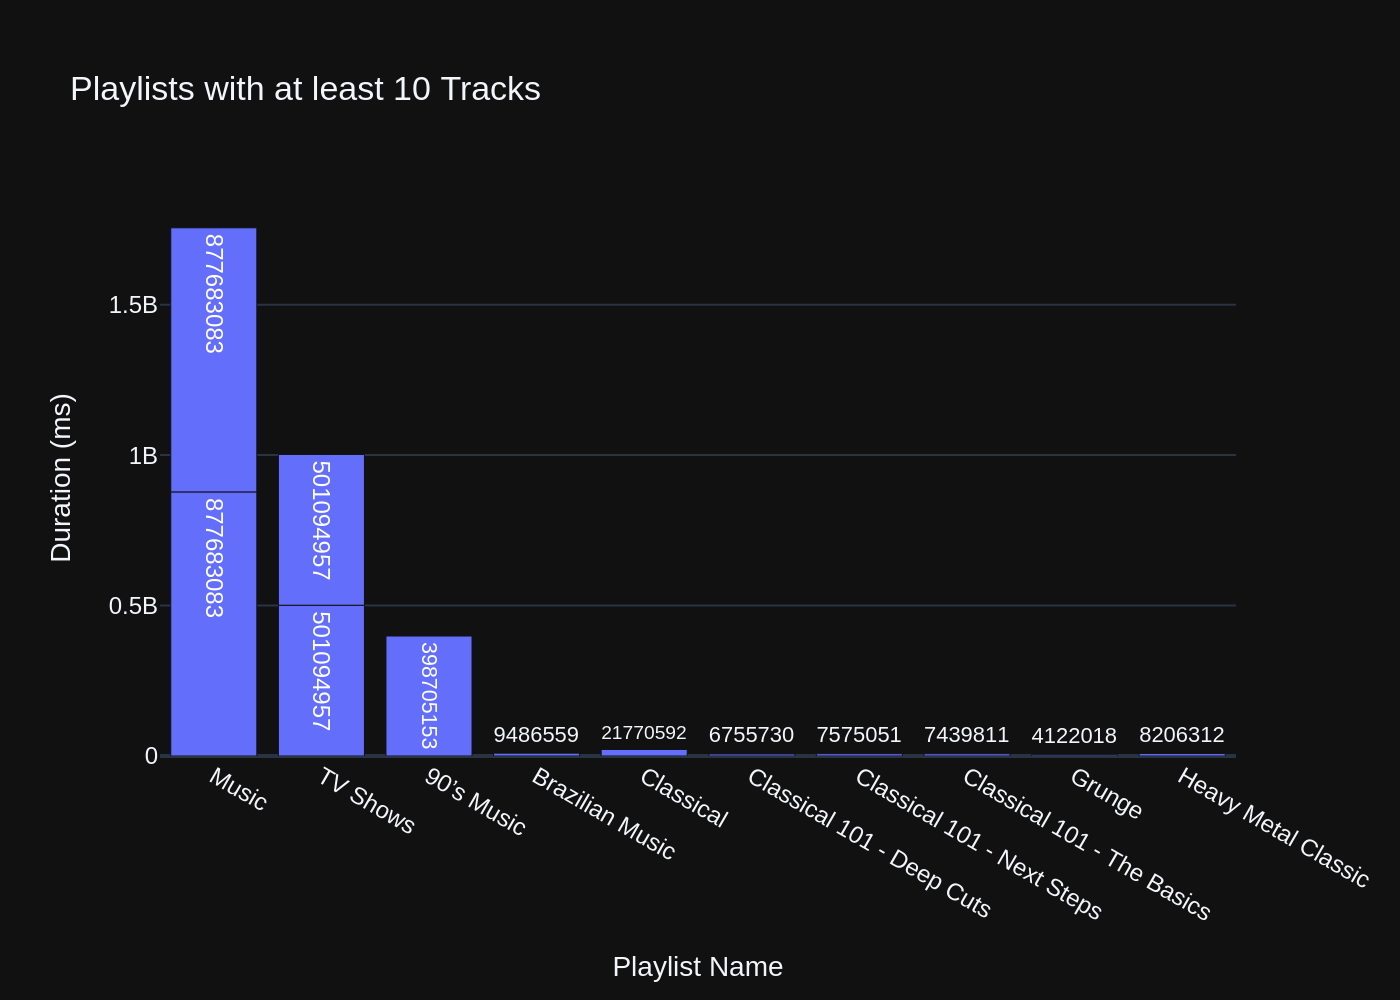





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Name, COUNT(DISTINCT g.GenreId) as num_genres FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId JOIN genres AS g ON t.GenreId = g.GenreId GROUP BY a.ArtistId HAVING COUNT(DISTINCT g.GenreId) > 1 LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT a.Name, COUNT(DISTINCT g.GenreId) as num_genres FROM artists AS a JOIN albums AS al ON a.ArtistId = al.ArtistId JOIN tracks AS t ON al.AlbumId = t.AlbumId JOIN genres AS g ON t.GenreId = g.GenreId GROUP BY a.ArtistId HAVING COUNT(DISTINCT g.GenreId) > 1 LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name,num_genres
0,Antônio Carlos Jobim,2
1,Audioslave,3
2,Various Artists,3
3,Gilberto Gil,3
4,Eric Clapton,2
5,Faith No More,2
6,Foo Fighters,2
7,Guns N' Roses,2
8,Iron Maiden,4
9,Jamiroquai,3



Ollama parameters:
model=codegeex4:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if the DataFrame has more than one row
if len(df) > 1:
    # Create a bar chart
    fig = px.bar(df, x='Name', y='num_genres', title='Artists with Albums in Multiple Genres')
else:
    # Create an indicator
    value = df.iloc[0]['num_genres']
    name = df.iloc[0]['Name']
    fig = go.Figure(go.Indicator(
        mode="number+gauge",
        gauge={'bar':{'color':'green'}},
        value=value,
        title={'text': f"Artist: {name}"},
        domain={'x':[0,1], 'y':[0,1]}
    ))

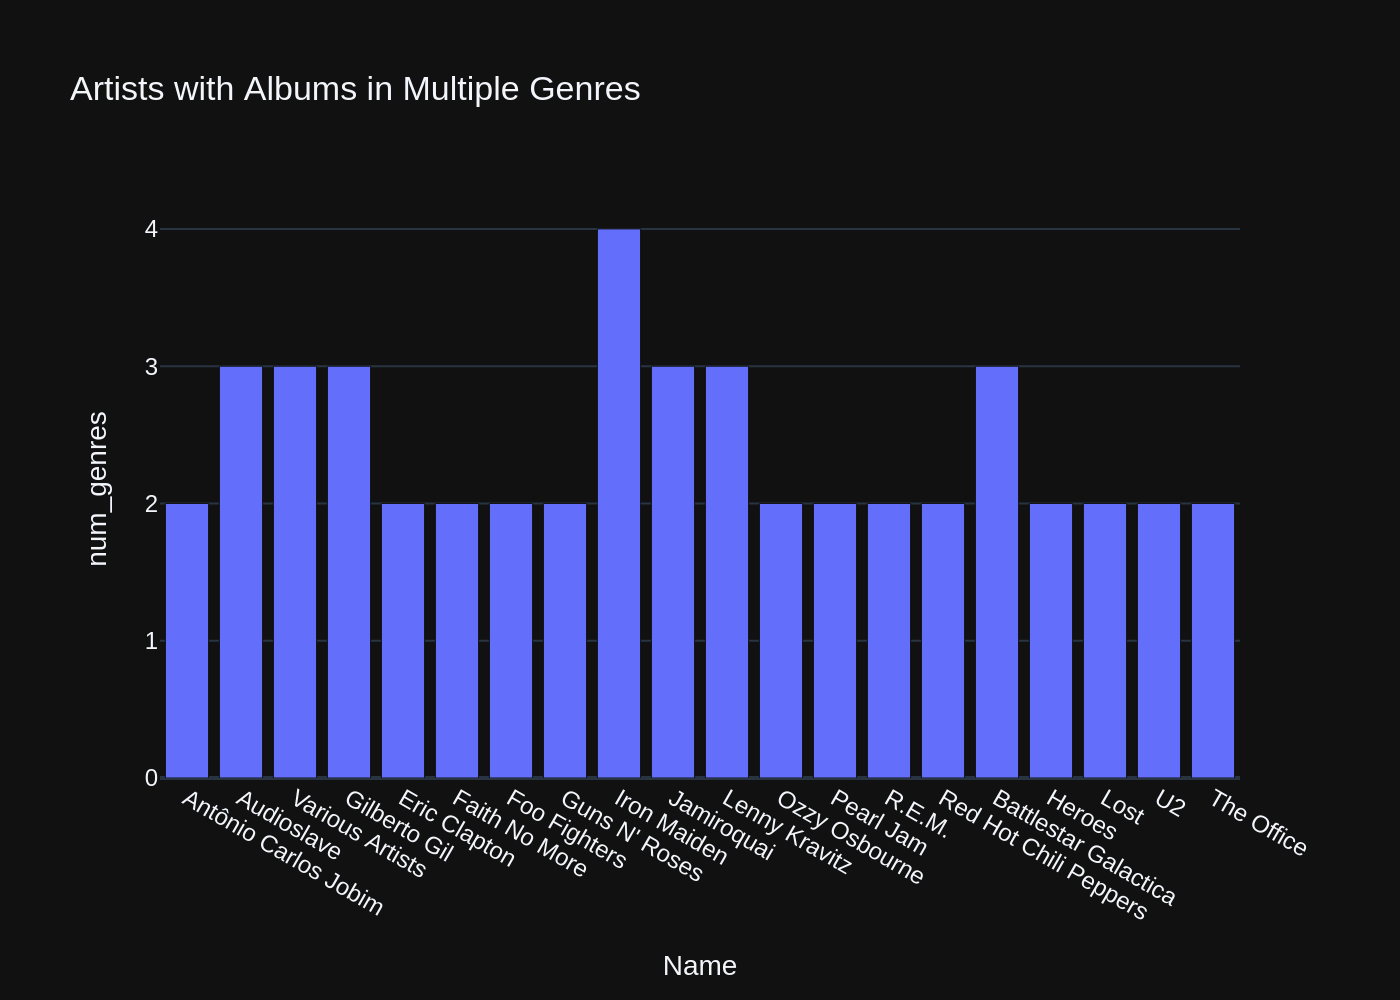

elapsed_time = 213.5799753665924


In [17]:
ts_start = time()

for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue
    
    vn.ask_adaptive(question=question, tag_id=n+2)
    
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Check completion time

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'codegeex4' 
 took 214 sec
 run on 'ducklover1' 
 at 20241121-225028


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-codegeex4-214s-ducklover1-20241121-225028.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,092be065-5a42-591f-9079-33f77a74fc31-sql,Find the top 5 most expensive tracks (based on...,SELECT * FROM tracks ORDER BY UnitPrice DESC L...,sql
1,0ccd7b66-5344-502c-878f-3b4f3417e3d1-sql,Get the total number of invoices for each cust...,"SELECT CustomerId, COUNT(*) as invoice_count F...",sql
2,13f16b6e-9a5b-57b8-be42-67cd403dc00c-sql,Identify artists who have albums with tracks a...,"SELECT a.Name, COUNT(DISTINCT g.GenreId) as nu...",sql
3,204f9289-25a1-586a-82f6-993019b88040-sql,\n Generating SQL for this ...,"SELECT a.Name, COUNT(*) as num_tracks FROM art...",sql
4,2388a935-5876-57e6-972c-bb456b73a5df-sql,Get all playlists containing at least 10 track...,"SELECT p.Name, SUM(t.Milliseconds) as playlist...",sql
5,39205e23-c047-5170-a664-cf9fbd0ef4c2-sql,"Find all tracks with a name containing ""What"" ...",SELECT * FROM tracks WHERE Name LIKE '%What%' ...,sql
6,490195ed-83fc-5e79-a109-fe0d74edb9ae-sql,what are the top 5 countries that customers co...,"SELECT BillingCountry, COUNT(*) as count FROM ...",sql
7,4dcd19bd-8d7d-5381-bf3c-c4b93e7bbaf0-sql,List all genres and the number of tracks in ea...,"SELECT g.Name, COUNT(*) as num_tracks FROM gen...",sql
8,52b655f7-e6ef-553c-924e-c3560328690d-sql,Find the total number of invoices per country,"SELECT BillingCountry, COUNT(*) as invoice_cou...",sql
9,59326e87-0454-50a5-b797-ef9dea08cec2-sql,Get the average invoice total for each customer:,"SELECT CustomerId, AVG(Total) as avg_total FRO...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)